## 1. Import the dataset

The first step is importing the dataset we need. One is using `Google Drive` and mount it to the colab, the other is using the `kagglehub` package.

For simplicity reason, here we used `kagglehub` package to download the dataset we need.

**Dataset link:** [zometo-bangalore-restaurants](https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants)

In [ ]:
# in case you did not install kagglehub package
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshupoddar/zomato-bangalore-restaurants")

print("Path to dataset files:", path)

100%|██████████| 89.0M/89.0M [00:01<00:00, 61.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/himanshupoddar/zomato-bangalore-restaurants/versions/1


## 2. Define Constant Variables and Import some pakcages

This part is to define some often used constant variables.

In [ ]:
# define constants
RANDOM_STATE = 42  # set random_state
DATASET_PATH = f"{path}/zomato.csv"

In [ ]:
# import auxillary packages
import re

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图像大小和 DPI
plt.rcParams['figure.figsize'] = (10, 6)  # 图像宽 10 英寸，高 6 英寸
plt.rcParams['figure.dpi'] = 100          # 图像分辨率，适合在屏幕上查看
# 设置字体
plt.rcParams['font.family'] = 'sans-serif'  # 字体族，sans-serif 保持清晰现代
plt.rcParams['font.sans-serif'] = 'Arial'   # 设置为 Arial 这种易读性强的英文字体
# 设置标题和标签的字体大小
plt.rcParams['axes.titlesize'] = 16         # 标题字体大小
plt.rcParams['axes.labelsize'] = 14         # 轴标签字体大小
plt.rcParams['xtick.labelsize'] = 12        # x 轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 12        # y 轴刻度字体大小
# 设置线条样式和宽度
plt.rcParams['lines.linewidth'] = 2         # 默认线条宽度
plt.rcParams['lines.markersize'] = 6        # 默认标记大小
# 取消顶部和右侧边框，适用于现代风格
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# 颜色主题
sns.set_palette("Set2")                      # 柔和的颜色主题
sns.set_style("whitegrid")                   # 白色网格背景，适合阅读性
sns.set_context("notebook")                  # 适合在笔记本中显示的风格
# 设置图例字体大小
plt.rcParams['legend.fontsize'] = 12
# 坐标轴标题间距
plt.rcParams['axes.titlepad'] = 15          # 标题和轴的距离
plt.rcParams['axes.labelpad'] = 10          # 标签和轴的距离

## 3. Load the dataset

We will load the dataset and take a look at the first few rows of the dataset.

In [ ]:
original_zomato_restaurants = pd.read_csv(DATASET_PATH)
original_zomato_restaurants.head()
original_zomato_restaurants['original_index'] = original_zomato_restaurants.index

In [ ]:
# See shape of the dataset
original_zomato_restaurants.shape

(51717, 18)

In [ ]:
original_zomato_restaurants['']

In [ ]:
# See info of the dataset
print([x for x in original_zomato_restaurants['rest_type']])

['Casual Dining', 'Casual Dining', 'Cafe, Casual Dining', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Casual Dining', 'Casual Dining, Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe, Casual Dining', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Quick Bites, Cafe', 'Cafe', 'Cafe', 'Cafe, Quick Bites', 'Cafe', 'Cafe', 'Casual Dining, Cafe', 'Cafe', 'Quick Bites', 'Delivery', 'Delivery', 'Quick Bites', 'Delivery', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Quick Bites', 'Mess', 'Quick Bites', 'Quick Bites', 'Casual Dining, Cafe', 'Delivery', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Quick Bites', 'Quick Bites', 'Dessert Parlor', 'Casual Dining', 'Quick Bites', 'Delivery', 'Quick Bites', 'Casual Dining', 'Quick Bites', 'Dessert Parlor', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Casual Dining', 'Bakery, Dessert Parlor', 'Quick Bites', 'Quick Bites', 'Pub', 'Bakery', 'Quick Bites', 'Takeaway, Delivery'

In [ ]:
# write non empty cuisine to a file
with open('non_empty_cuisine.txt', 'w') as f:
    for cuisine in original_zomato_restaurants[original_zomato_restaurants['cuisines'].notna()]['cuisines']:
        f.write(cuisine + '\n')

There are `51717` entris with `16` columns.

The useful columns are,

* `address`: maybe we can find some geography information.
* `name`: do not have any meaning.
* `online_order`: 0/1 is ok.
* `book_table`: 0/1 is ok.
* `rate`: our $y_{pred}$
* `votes`: to select certain data samples we want to explore.
* `phone`: do not have any meaning.
* `location`: provide some geography information.
* `rest_type`: type of restaurant.
* `dish_liked`: people like.
* `cuisines`: provide cuisines. Can use some text-analysis technologies.
* `approx_cost`: useful.
* `reviews_list`: can not use in our analysis.
* `menu_item`: useful. How can we use it?
* `listed_in(type)`: what kind of restaurant does it?
* `listed_in(city)`: provide geography information.

The useful columns are,

* `address`: maybe we can find some geography information. (地址)
* `listed_in(city)`: provide geography information. (地区)
* `location`: provide some geography information.

* `online_order`: 0/1 is ok.
* `book_table`: 0/1 is ok.
* `rest_type`: type of restaurant. 0/1

* `dish_liked`: people like. 1~N
* `cuisines`: provide cuisines. Can use some text-analysis technologies. -> vector (10 dimension)
* `approx_cost`: useful. (one people)
* `menu_item`: useful. How can we use it? (不用) 0/1

* `listed_in(type)`: what kind of restaurant does it? 0/1

8个x -> 1个y

* `rate`: our $y_{pred}$

linear regression + 有交叉项的

## 4. Deal with Missing Data, Noisy Data, and so on

After the data inspection, we need to deal with the raw data, to denoise or remove the missing data.

In [ ]:
# eliminate missing ratings
without_missing_ratings = original_zomato_restaurants.dropna(subset=['rate'])
only_missing_ratings = original_zomato_restaurants[original_zomato_restaurants['rate'].isna()]

print(without_missing_ratings.shape)
only_missing_ratings.shape

(43942, 18)


(7775, 18)

In [ ]:
# eliminate certain columns' value less than 30
without_less_comment_ratings = without_missing_ratings[without_missing_ratings['votes'] > 30]

only_less_comment_ratings = without_missing_ratings[without_missing_ratings['votes'] <= 30]
print(without_less_comment_ratings.shape)
only_less_comment_ratings.shape

(28372, 18)


(15570, 18)

In [ ]:
# all value together
ratings_need_mark = pd.concat([only_less_comment_ratings, only_missing_ratings], ignore_index=True)
ratings_need_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23345 entries, 0 to 23344
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23345 non-null  object
 1   address                      23345 non-null  object
 2   name                         23345 non-null  object
 3   online_order                 23345 non-null  object
 4   book_table                   23345 non-null  object
 5   rate                         15570 non-null  object
 6   votes                        23345 non-null  int64 
 7   phone                        22603 non-null  object
 8   location                     23324 non-null  object
 9   rest_type                    23202 non-null  object
 10  dish_liked                   265 non-null    object
 11  cuisines                     23302 non-null  object
 12  approx_cost(for two people)  23168 non-null  object
 13  reviews_list                 23

In [ ]:
# eliminate url columns
without_url_ratings = without_less_comment_ratings.drop(columns=['url'])
print(without_url_ratings.shape)

ratings_need_mark = ratings_need_mark.drop(columns=['url'])
ratings_need_mark.shape

(28372, 17)


(23345, 17)

In [ ]:
# eliminate phone columns
without_phone_ratings = without_url_ratings.drop(columns=['phone'])
print(without_phone_ratings.shape)
ratings_need_mark = ratings_need_mark.drop(columns=['phone'])
ratings_need_mark.shape

(28372, 16)


(23345, 16)

In [ ]:
# eliminate name columns
without_name_ratings = without_phone_ratings.drop(columns=['name'])
print(without_name_ratings.shape)
ratings_need_mark = ratings_need_mark.drop(columns=['name'])
ratings_need_mark.shape

(28372, 15)


(23345, 15)

In [ ]:
# see the info of our dataframe
without_name_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28372 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      28372 non-null  object
 1   online_order                 28372 non-null  object
 2   book_table                   28372 non-null  object
 3   rate                         28372 non-null  object
 4   votes                        28372 non-null  int64 
 5   location                     28372 non-null  object
 6   rest_type                    28288 non-null  object
 7   dish_liked                   23374 non-null  object
 8   cuisines                     28370 non-null  object
 9   approx_cost(for two people)  28203 non-null  object
 10  reviews_list                 28372 non-null  object
 11  menu_item                    28372 non-null  object
 12  listed_in(type)              28372 non-null  object
 13  listed_in(city)              28372 n

We still have some important feature missing.

* `approx_cost`: Use average cost to fill `NaN`.
* `rest_type`: **Restaurant Type** Maybe important but we can not deal with it.
* `cuisines`: Not important. We can do word-vectorize to set it to all 0.
* `dish_liked`: **Dishes people liked in the restaurant** Maybe important but we can not deal with it.

In [ ]:
# Remove restaurants that do not have rest_type
without_missing_rest_type = without_name_ratings.dropna(subset=['rest_type'])
print(without_missing_rest_type.shape)
ratings_need_mark = ratings_need_mark.dropna(subset=['rest_type'])
ratings_need_mark.shape

(28288, 15)


(23202, 15)

In [ ]:
without_missing_rest_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      28288 non-null  object
 1   online_order                 28288 non-null  object
 2   book_table                   28288 non-null  object
 3   rate                         28288 non-null  object
 4   votes                        28288 non-null  int64 
 5   location                     28288 non-null  object
 6   rest_type                    28288 non-null  object
 7   dish_liked                   23304 non-null  object
 8   cuisines                     28286 non-null  object
 9   approx_cost(for two people)  28121 non-null  object
 10  reviews_list                 28288 non-null  object
 11  menu_item                    28288 non-null  object
 12  listed_in(type)              28288 non-null  object
 13  listed_in(city)              28288 n

We have not dealt with `dtype` yet. We may do this part later.

In [ ]:
ratings_need_mark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23202 entries, 0 to 23344
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23202 non-null  object
 1   online_order                 23202 non-null  object
 2   book_table                   23202 non-null  object
 3   rate                         15503 non-null  object
 4   votes                        23202 non-null  int64 
 5   location                     23202 non-null  object
 6   rest_type                    23202 non-null  object
 7   dish_liked                   265 non-null    object
 8   cuisines                     23180 non-null  object
 9   approx_cost(for two people)  23046 non-null  object
 10  reviews_list                 23202 non-null  object
 11  menu_item                    23202 non-null  object
 12  listed_in(type)              23202 non-null  object
 13  listed_in(city)              23202 n

In [ ]:
ratings_need_mark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23202 entries, 0 to 23344
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23202 non-null  object
 1   online_order                 23202 non-null  object
 2   book_table                   23202 non-null  object
 3   rate                         15503 non-null  object
 4   votes                        23202 non-null  int64 
 5   location                     23202 non-null  object
 6   rest_type                    23202 non-null  object
 7   dish_liked                   265 non-null    object
 8   cuisines                     23180 non-null  object
 9   approx_cost(for two people)  23046 non-null  object
 10  reviews_list                 23202 non-null  object
 11  menu_item                    23202 non-null  object
 12  listed_in(type)              23202 non-null  object
 13  listed_in(city)              23202 n

### Fill approx_cost and Convert it into One-People

Now its time to fill the approximate cost and convert it into one people cost.

In [ ]:
# calculate the average cost
without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'].str.replace(',', '').astype(float)
average_cost = without_missing_rest_type['approx_cost(for two people)'].mean()
print(f"The average cost of two people in one restaurant is: {average_cost}")

ratings_need_mark['approx_cost(for two people)'] = ratings_need_mark['approx_cost(for two people)'].str.replace(',', '').astype(float)
average_cost2 = ratings_need_mark['approx_cost(for two people)'].mean()


The average cost of two people in one restaurant is: 701.4540734682266


<ipython-input-20-59410adaaf90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'].str.replace(',', '').astype(float)


In [ ]:
without_missing_rest_type['approx_cost(for two people)'].median()

550.0

# fill NaN with average_cost


In [ ]:
without_missing_rest_type['approx_cost(for two people)'].fillna(average_cost, inplace=True)
ratings_need_mark['approx_cost(for two people)'].fillna(average_cost2, inplace=True)
without_missing_rest_type.info()

<ipython-input-22-72047f857c12>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  without_missing_rest_type['approx_cost(for two people)'].fillna(average_cost, inplace=True)
<ipython-input-22-72047f857c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type['approx_cost(for two people)'].fillna(average_cost, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      28288 non-null  object 
 1   online_order                 28288 non-null  object 
 2   book_table                   28288 non-null  object 
 3   rate                         28288 non-null  object 
 4   votes                        28288 non-null  int64  
 5   location                     28288 non-null  object 
 6   rest_type                    28288 non-null  object 
 7   dish_liked                   23304 non-null  object 
 8   cuisines                     28286 non-null  object 
 9   approx_cost(for two people)  28288 non-null  float64
 10  reviews_list                 28288 non-null  object 
 11  menu_item                    28288 non-null  object 
 12  listed_in(type)              28288 non-null  object 
 13  listed_in(city)      

In [ ]:
# transfer the cost into one people
without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'] / 2
without_missing_rest_type.head()

ratings_need_mark['approx_cost(for two people)'] = ratings_need_mark['approx_cost(for two people)'] / 2

<ipython-input-23-6a2ae3c9c929>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'] / 2


In [ ]:
# round the approx_cost column
without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'].round(2)
without_missing_rest_type.head()

ratings_need_mark['approx_cost(for two people)'] = ratings_need_mark['approx_cost(for two people)'].round(2)

<ipython-input-24-449999194b27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type['approx_cost(for two people)'] = without_missing_rest_type['approx_cost(for two people)'].round(2)


In [ ]:
# rename the approx_cost(for two people)
without_missing_rest_type.rename(columns={'approx_cost(for two people)': 'approx_cost_for_one_people'}, inplace=True)
without_missing_rest_type.head()

ratings_need_mark.rename(columns={'approx_cost(for two people)': 'approx_cost_for_one_people'}, inplace=True)

<ipython-input-25-8103a52eb2a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type.rename(columns={'approx_cost(for two people)': 'approx_cost_for_one_people'}, inplace=True)


In [ ]:
ratings_need_mark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23202 entries, 0 to 23344
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     23202 non-null  object 
 1   online_order                23202 non-null  object 
 2   book_table                  23202 non-null  object 
 3   rate                        15503 non-null  object 
 4   votes                       23202 non-null  int64  
 5   location                    23202 non-null  object 
 6   rest_type                   23202 non-null  object 
 7   dish_liked                  265 non-null    object 
 8   cuisines                    23180 non-null  object 
 9   approx_cost_for_one_people  23202 non-null  float64
 10  reviews_list                23202 non-null  object 
 11  menu_item                   23202 non-null  object 
 12  listed_in(type)             23202 non-null  object 
 13  listed_in(city)             23202 no

### Reformulate rating column

The format of one rating is xx/5. We are just interested in the xx part.

In [ ]:
def convert_rating(rating):
    return float(re.findall(r'\d+\.\d+|\d+', rating)[0])

without_missing_rest_type['rate'] = without_missing_rest_type['rate'].apply(convert_rating)
without_missing_rest_type['rate'].head()


<ipython-input-27-dc30ebd2531e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_missing_rest_type['rate'] = without_missing_rest_type['rate'].apply(convert_rating)


,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [ ]:
# get our final data
final_zomato_restaurants = without_missing_rest_type.copy()
final_zomato_restaurants.info()

ratings_need_mark_final = ratings_need_mark.copy()


<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     28288 non-null  object 
 1   online_order                28288 non-null  object 
 2   book_table                  28288 non-null  object 
 3   rate                        28288 non-null  float64
 4   votes                       28288 non-null  int64  
 5   location                    28288 non-null  object 
 6   rest_type                   28288 non-null  object 
 7   dish_liked                  23304 non-null  object 
 8   cuisines                    28286 non-null  object 
 9   approx_cost_for_one_people  28288 non-null  float64
 10  reviews_list                28288 non-null  object 
 11  menu_item                   28288 non-null  object 
 12  listed_in(type)             28288 non-null  object 
 13  listed_in(city)             28288 no

In [ ]:
final_zomato_restaurants.head()

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost_for_one_people,reviews_list,menu_item,listed_in(type),listed_in(city),original_index
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4


In [ ]:
# eliminate address
final_zomato_restaurants_without_address = final_zomato_restaurants.drop(columns=['address'])
print(final_zomato_restaurants_without_address.info())
ratings_need_mark_final = ratings_need_mark_final.drop(columns=['address'])
ratings_need_mark_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_order                28288 non-null  object 
 1   book_table                  28288 non-null  object 
 2   rate                        28288 non-null  float64
 3   votes                       28288 non-null  int64  
 4   location                    28288 non-null  object 
 5   rest_type                   28288 non-null  object 
 6   dish_liked                  23304 non-null  object 
 7   cuisines                    28286 non-null  object 
 8   approx_cost_for_one_people  28288 non-null  float64
 9   reviews_list                28288 non-null  object 
 10  menu_item                   28288 non-null  object 
 11  listed_in(type)             28288 non-null  object 
 12  listed_in(city)             28288 non-null  object 
 13  original_index              28288 no

In [ ]:
# eliminate reviews_list
final_zomato_restaurants_without_reviews = final_zomato_restaurants_without_address.drop(columns=['reviews_list'])
final_zomato_restaurants_without_reviews.head()

ratings_need_mark_final = ratings_need_mark_final.drop(columns=['reviews_list'])


In [ ]:
# see how many categories in location
final_zomato_restaurants_without_reviews['location'].value_counts()

,count
location,
BTM,2204
Koramangala 5th Block,1889
Indiranagar,1505
HSR,1440
JP Nagar,1226
...,...
West Bangalore,3
North Bangalore,3
Central Bangalore,3


In [ ]:
# see how many categories in listed_in(city)
final_zomato_restaurants_without_reviews['listed_in(city)'].value_counts()

,count
listed_in(city),
BTM,1749
Koramangala 7th Block,1634
Koramangala 4th Block,1587
Koramangala 5th Block,1556
Koramangala 6th Block,1482
Jayanagar,1299
Indiranagar,1161
MG Road,1143
Church Street,1123


In [ ]:
len(final_zomato_restaurants_without_reviews['listed_in(city)'].value_counts())

30

`location` is more detailed than `listed_in(city)`. However, the dimension of `location` is too high than `listed_in(city)`. We shall use the `listed_in(city)` part.

In [ ]:
# eliminate location
final_zomato_restaurants_without_location = final_zomato_restaurants_without_reviews.drop(columns=['location'])
final_zomato_restaurants_without_location.head()

ratings_need_mark_final = ratings_need_mark_final.drop(columns=['location'])


In [ ]:
# get final zomato data
final_zomato_restaurants = final_zomato_restaurants_without_location.copy()
final_zomato_restaurants.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),listed_in(city),original_index
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,[],Buffet,Banashankari,0
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,[],Buffet,Banashankari,1
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,[],Buffet,Banashankari,2
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,[],Buffet,Banashankari,3
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,[],Buffet,Banashankari,4


In [ ]:
final_zomato_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_order                28288 non-null  object 
 1   book_table                  28288 non-null  object 
 2   rate                        28288 non-null  float64
 3   votes                       28288 non-null  int64  
 4   rest_type                   28288 non-null  object 
 5   dish_liked                  23304 non-null  object 
 6   cuisines                    28286 non-null  object 
 7   approx_cost_for_one_people  28288 non-null  float64
 8   menu_item                   28288 non-null  object 
 9   listed_in(type)             28288 non-null  object 
 10  listed_in(city)             28288 non-null  object 
 11  original_index              28288 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.8+ MB


In [ ]:
ratings_need_mark_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23202 entries, 0 to 23344
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_order                23202 non-null  object 
 1   book_table                  23202 non-null  object 
 2   rate                        15503 non-null  object 
 3   votes                       23202 non-null  int64  
 4   rest_type                   23202 non-null  object 
 5   dish_liked                  265 non-null    object 
 6   cuisines                    23180 non-null  object 
 7   approx_cost_for_one_people  23202 non-null  float64
 8   menu_item                   23202 non-null  object 
 9   listed_in(type)             23202 non-null  object 
 10  listed_in(city)             23202 non-null  object 
 11  original_index              23202 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# see the nan in cuisines
final_zomato_restaurants[final_zomato_restaurants['cuisines'].isna()]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),listed_in(city),original_index
39171,No,No,3.6,31,Casual Dining,NaN,NaN,350.73,[],Dine-out,Lavelle Road,39171
45813,No,No,4.0,1137,Casual Dining,NaN,NaN,350.73,[],Dine-out,Old Airport Road,45813


In [ ]:
# fill nan
final_zomato_restaurants['cuisines'].fillna('', inplace=True)
final_zomato_restaurants.info()
ratings_need_mark_final['cuisines'].fillna('', inplace=True)
ratings_need_mark_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_order                28288 non-null  object 
 1   book_table                  28288 non-null  object 
 2   rate                        28288 non-null  float64
 3   votes                       28288 non-null  int64  
 4   rest_type                   28288 non-null  object 
 5   dish_liked                  23304 non-null  object 
 6   cuisines                    28288 non-null  object 
 7   approx_cost_for_one_people  28288 non-null  float64
 8   menu_item                   28288 non-null  object 
 9   listed_in(type)             28288 non-null  object 
 10  listed_in(city)             28288 non-null  object 
 11  original_index              28288 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'

<ipython-input-40-688089922e9e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_zomato_restaurants['cuisines'].fillna('', inplace=True)
<ipython-input-40-688089922e9e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# fill nan in disliked
final_zomato_restaurants['dish_liked'].fillna('', inplace=True)
final_zomato_restaurants.info()
ratings_need_mark_final['dish_liked'].fillna('', inplace=True)
ratings_need_mark_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28288 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_order                28288 non-null  object 
 1   book_table                  28288 non-null  object 
 2   rate                        28288 non-null  float64
 3   votes                       28288 non-null  int64  
 4   rest_type                   28288 non-null  object 
 5   dish_liked                  28288 non-null  object 
 6   cuisines                    28288 non-null  object 
 7   approx_cost_for_one_people  28288 non-null  float64
 8   menu_item                   28288 non-null  object 
 9   listed_in(type)             28288 non-null  object 
 10  listed_in(city)             28288 non-null  object 
 11  original_index              28288 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'

<ipython-input-41-3c4c59f425fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_zomato_restaurants['dish_liked'].fillna('', inplace=True)
<ipython-input-41-3c4c59f425fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# save final_zomato_restaurants to csv
final_zomato_restaurants.to_csv('final_zomato_restaurants11.csv', index=True)
ratings_need_mark_final.to_csv('ratings_need_mark11.csv', index=True)

In [ ]:
final_zomato_restaurants.shape
ratings_need_mark_final.shape

(23202, 12)

## 5. Visualize our data

In this part we can do the visualization on the data.

### Visualize `cuisines`

There are many cuisines in the list. In our analytics, we can transfert them into one-hot encoding and do some dimension reduction. Here, we just need to do the statistics and draw graphs.

In [ ]:
# count different number of cuisines
cuisines_count = final_zomato_restaurants['cuisines'].str.split(', ').explode().value_counts()
cuisines_count

,count
cuisines,
North Indian,12263
Chinese,9169
Continental,4537
Fast Food,4007
Cafe,3913
...,...
Tamil,4
Raw Meats,4
Sindhi,4


There are 100 types of cuisines. So high dimension data it is. Let's first draw
a bar chart to see the distribution.

<ipython-input-45-c3e8102ec16c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisines_count[:50].index, y=cuisines_count[:50].values, palette='Spectral')


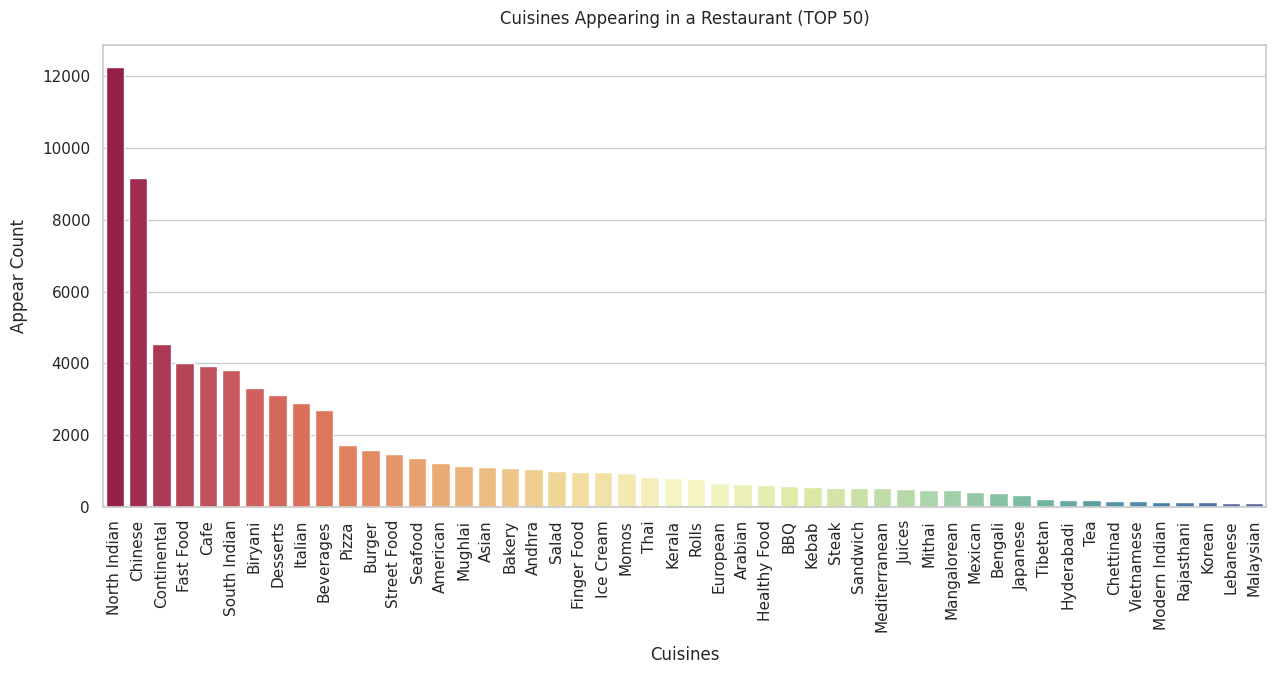

In [ ]:
# draw the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=cuisines_count[:50].index, y=cuisines_count[:50].values, palette='Spectral')
plt.xlabel('Cuisines')
plt.ylabel('Appear Count')
plt.title('Cuisines Appearing in a Restaurant (TOP 50)')
plt.xticks(rotation=90)
plt.show()

#### Cuisine Column Word-Embedding
After visualizing the cuisine data, let's do the word embedding part. We can use `GloVe` from Stanford Univerisity.

[GloVe](https://nlp.stanford.edu/projects/glove/)

Firstly, let's download the word-embedding data set.

In [ ]:
# download and unzip the GloVe word-embedding pre-trained model
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-11-06 08:55:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-06 08:55:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-06 08:55:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# do the word-embedding of the cuisines column
from gensim.models import KeyedVectors

# Load GloVe word-vector
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# transform a setence into word-embedding vector
def sentence_to_embedding(sentence, glove_model, embedding_dim=50):
    words = sentence.split(', ')
    embeddings = [glove_model[word] for word in words if word in glove_model]
    if len(embeddings) == 0:
        return np.zeros(embedding_dim)  # if there were no words can calculate vector, return zero-vector
    return np.mean(embeddings, axis=0)  # calculate average value as word-vector

In [ ]:
# load the model first
glove_model = load_glove_model('glove.6B.100d.txt')

In [ ]:
# load the pre-trained word-embedding model
# glove_model = load_glove_model('glove.6B.50d.txt')
sentence = 'North Indian, Mughlai, Chinese'  # must be converted into lower case!!!
print(sentence.lower())
embedding = sentence_to_embedding(sentence.lower(), glove_model)
print(embedding)

north indian, mughlai, chinese
[ 2.91940004e-01  2.10700497e-01  4.03025001e-01  6.45020008e-01
  1.56481504e-01  5.95850013e-02 -3.52458507e-01 -6.93154991e-01
  6.87400028e-02  2.27964997e-01 -7.66584992e-01  3.26070003e-02
  7.51993477e-01  1.40284494e-01 -6.96420014e-01  7.73070008e-02
 -6.33699894e-02 -3.29895020e-01 -3.29304516e-01 -9.76749957e-02
  2.42559999e-01 -4.32549976e-02 -1.01344503e-01 -5.23149967e-02
 -4.33230013e-01  5.07500023e-03  8.59502703e-04  2.20500007e-02
 -1.60158500e-01 -3.61369997e-01 -8.15729976e-01  5.43339968e-01
 -1.06570005e-01 -4.66390014e-01  1.48975000e-01 -4.95700017e-02
  1.26921996e-01  1.73149854e-02 -3.51175487e-01 -2.77489990e-01
 -5.89770019e-01 -1.49175018e-01 -1.71723500e-01  9.52787548e-02
  6.69249952e-01  6.56699985e-02 -3.60887021e-01  9.18380022e-02
  8.94965008e-02 -3.22964996e-01 -8.15719962e-02 -1.99730009e-01
 -9.66900066e-02  1.08460009e-01 -3.41949984e-02 -1.92945033e-01
 -2.14469999e-01  2.24645004e-01  1.11979496e+00 -2.4629899

In [ ]:
final_zomato_restaurants['cuisines'].shape

(28288,)

In [ ]:
# construct the word embedding matrix
cuisines_of_restaurants = final_zomato_restaurants['cuisines']
cuisines_word_embedding_vectors = []

for cuisine in cuisines_of_restaurants:
    # check whether cuisine is a str
    if not isinstance(cuisine, str):
        continue
    embedding = sentence_to_embedding(cuisine.lower(), glove_model)
    cuisines_word_embedding_vectors.append(embedding)

cuisines_word_embedding_vectors = pd.DataFrame(cuisines_word_embedding_vectors)
cuisines_word_embedding_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.291940,0.210700,0.403025,0.645020,0.156482,0.059585,-0.352459,-0.693155,0.068740,0.227965,...,0.587215,0.118161,0.121290,-0.453370,-0.161750,-0.293805,-0.863700,-0.586663,0.166252,0.183475
1,-0.015155,0.076435,0.387745,0.489160,0.150284,0.315655,-0.814705,-0.678060,0.235160,0.128673,...,0.889705,-0.040289,-0.159550,-0.297685,-0.492690,-0.043090,-0.938350,-0.773900,0.207110,-0.093995
2,0.544797,-0.280935,0.041518,0.497373,0.017472,0.863680,0.140603,-0.294443,-0.049343,0.309635,...,0.561746,-0.159047,-0.186993,0.121467,-0.417577,0.112997,-0.585893,0.044773,0.581262,0.325151
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.258630,0.050014,0.076007,0.455190,-0.008221,0.930660,-0.390100,-0.553430,-0.198420,0.731980,...,0.512460,-0.316750,-0.033562,-0.195290,-0.295460,-0.123960,-0.278160,-0.109080,-0.150030,0.163010


In [ ]:
# construct the word embedding matrix
cuisines_of_restaurants1 = ratings_need_mark_final['cuisines']
cuisines_word_embedding_vectors1 = []

for cuisine in cuisines_of_restaurants1:
    # check whether cuisine is a str
    if not isinstance(cuisine, str):
        continue
    embedding = sentence_to_embedding(cuisine.lower(), glove_model)
    cuisines_word_embedding_vectors1.append(embedding)

cuisines_word_embedding_vectors1 = pd.DataFrame(cuisines_word_embedding_vectors1)
cuisines_word_embedding_vectors1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.534830,0.061220,0.671055,0.661295,0.318000,0.084445,-0.445465,-0.235960,0.126953,0.450895,...,1.114625,-0.218988,-0.679080,-0.083580,-0.399520,0.178420,-0.38345,-0.357940,0.59716,-0.095259
1,0.284191,-0.002654,0.331674,0.634295,-0.024554,0.374015,0.217413,-0.408018,-0.233567,0.297585,...,0.528857,0.042166,0.045125,-0.010508,-0.158815,0.104408,-0.68411,-0.213121,0.62961,0.256882
2,0.233950,-0.494520,-0.193840,0.530370,0.083125,1.192700,0.671480,0.390650,0.448670,0.076321,...,1.336500,0.377960,0.291640,0.243400,-0.379250,0.461950,-0.10969,0.015625,1.03510,0.897030
3,0.443665,-0.491390,-0.577935,0.329565,0.008558,0.774270,0.770930,0.236567,0.543055,0.333986,...,0.997195,0.458785,0.234830,0.219865,-0.681740,0.146505,0.28528,0.076427,1.16765,0.813350
4,0.050390,-0.199097,0.040875,0.183155,0.114717,0.717350,0.717185,0.270895,0.190578,-0.148774,...,0.539780,0.112665,0.198345,-0.230630,-0.573070,0.300570,-0.27245,-0.038895,1.12125,0.911440


In [ ]:
cuisines_word_embedding_vectors1.shape

(23202, 100)

In [ ]:
# fill nan
cuisines_word_embedding_vectors_without_nan = cuisines_word_embedding_vectors.fillna(0, inplace=False)
cuisines_word_embedding_vectors1 = cuisines_word_embedding_vectors1.fillna(0, inplace=False)

In [ ]:
cuisines_word_embedding_vectors_without_nan.shape

(28288, 100)

In [ ]:
# apply PCA analysis to cuisines_word_embedding_vectors
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
cuisines_word_embedding_vectors_pca = pca.fit_transform(cuisines_word_embedding_vectors_without_nan)

# see the cumulated explained variance
print(pca.explained_variance_ratio_.cumsum())

[0.33746993 0.49322673 0.59146665 0.65988332 0.70924271 0.7467568
 0.7812009  0.81157339 0.837267   0.85447462]


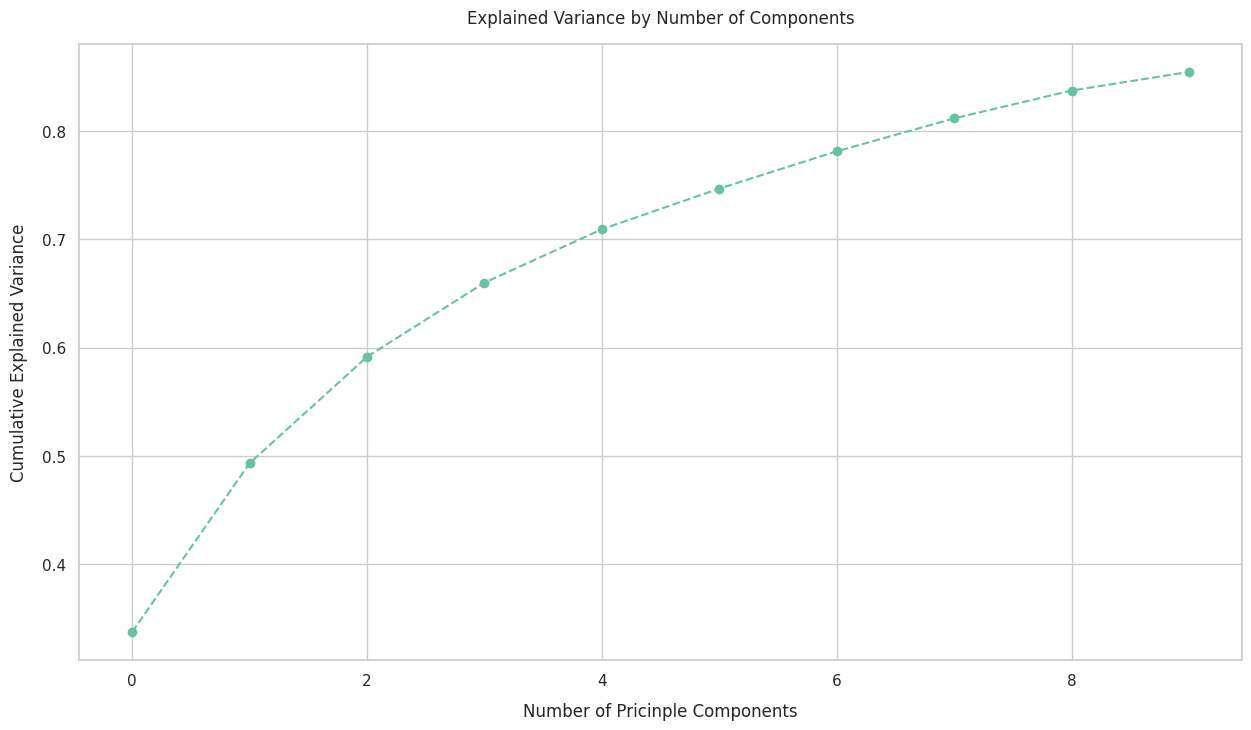

In [ ]:
# see the graph
plt.figure(figsize=(15, 8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Pricinple Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Seems good. Let's see 50d word-embedding.

In [ ]:
glove_model_50d = load_glove_model('glove.6B.50d.txt')

In [ ]:
# load the pre-trained word-embedding model
# glove_model = load_glove_model('glove.6B.50d.txt')
sentence = 'North Indian, Mughlai, Chinese'  # must be converted into lower case!!!
print(sentence.lower())
embedding = sentence_to_embedding(sentence.lower(), glove_model_50d)
print(embedding)

north indian, mughlai, chinese
[-0.406345   -0.15365    -0.81799495  0.245095   -0.05845499 -0.57223
  0.2420775   0.03422     0.11420999  0.2504415   0.55106497 -0.054948
  1.2685001   0.44405    -0.24400501 -0.349315   -0.244885    0.678185
  0.452425   -0.066351    0.562715    0.0131     -0.34054264  0.18955499
  0.857405   -0.86961    -0.53778    -0.62046003 -0.542355    0.129865
  1.3989849   0.19934301  0.311379    0.260215    0.032195    0.0585705
 -0.88231     0.512995   -0.82528996  0.338635   -0.31757998 -0.04789
  1.1107249   0.031005    1.01912    -0.2435635  -0.0711      0.61759496
  0.17524    -0.40699   ]


In [ ]:
cuisines_word_embedding_vectors_50d = []

for cuisine in cuisines_of_restaurants:
    # check whether cuisine is a str
    if not isinstance(cuisine, str):
        continue
    embedding = sentence_to_embedding(cuisine.lower(), glove_model_50d)
    cuisines_word_embedding_vectors_50d.append(embedding)

cuisines_word_embedding_vectors_50d = pd.DataFrame(cuisines_word_embedding_vectors_50d)
cuisines_word_embedding_vectors_50d.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.406345,-0.153650,-0.817995,0.245095,-0.058455,-0.572230,0.242077,0.034220,0.114210,0.250441,...,-0.317580,-0.047890,1.110725,0.031005,1.019120,-0.243564,-0.071100,0.617595,0.175240,-0.40699
1,-0.378495,-0.353635,-0.401250,0.929455,0.292740,-0.939330,0.206628,-0.064373,-0.252835,-0.128669,...,-0.690785,0.182765,0.847495,-0.279440,1.465350,-0.305475,-0.831915,0.238335,0.967290,-1.07675
2,0.563483,-0.259643,-0.995773,0.190999,0.265135,-0.687702,-0.906083,-0.103230,-0.671134,0.487470,...,0.229043,0.435889,0.715297,-0.679737,0.317729,-0.017267,-0.525307,-0.455587,0.640153,-0.25419
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,-0.799920,-0.658460,-1.624700,-0.062501,-0.080192,-0.135330,0.438550,-0.871510,-0.812980,1.015600,...,0.142820,0.557610,-0.022991,0.428500,-0.098885,-0.168780,0.146360,0.482320,0.107820,-0.89981


In [ ]:
cuisines_word_embedding_vectors_50d1 = []

for cuisine in cuisines_of_restaurants1:
    # check whether cuisine is a str
    if not isinstance(cuisine, str):
        continue
    embedding = sentence_to_embedding(cuisine.lower(), glove_model_50d)
    cuisines_word_embedding_vectors_50d1.append(embedding)

cuisines_word_embedding_vectors_50d1 = pd.DataFrame(cuisines_word_embedding_vectors_50d1)
cuisines_word_embedding_vectors_50d1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.381150,-0.295255,-0.412865,0.481085,-0.132295,-0.302850,0.482778,0.203045,-0.017735,-0.207313,...,-1.063150,0.146975,0.115000,-0.406830,0.269700,0.525370,-0.590790,0.090765,0.593530,-1.041295
1,0.366235,0.199127,-0.848270,0.332502,0.103615,-0.545651,-0.610241,-0.195410,-0.429501,-0.204094,...,0.223901,-0.022769,0.793915,-0.211057,0.423490,0.171910,-0.398224,-0.096003,0.246380,-0.448987
2,0.471330,0.559740,-0.872400,-0.012664,0.470960,-1.284600,-1.018700,-0.326340,-0.003401,0.553570,...,0.626190,0.017586,-0.134710,-0.106290,0.598330,0.246690,-0.533470,-1.121000,0.737440,0.182440
3,0.526170,0.126070,-0.773410,-0.057517,0.673110,-0.744150,-1.177100,-0.077170,0.290295,0.366990,...,0.585280,-0.105117,-0.240515,-0.336095,0.733680,0.351555,-0.613505,-0.942265,0.412219,0.195725
4,0.131355,0.028500,-1.098500,0.187513,0.196015,-0.406855,-0.833350,-0.913520,0.593750,0.700500,...,0.386380,-0.048492,0.032905,0.307815,0.363105,0.622330,-0.869985,-0.561117,0.581510,0.205975


In [ ]:
cuisines_word_embedding_vectors_50d.shape

(28288, 50)

In [ ]:
# do pca
pca_50d = PCA(n_components=10)
cuisines_word_embedding_vectors_pca_50d = pca_50d.fit_transform(cuisines_word_embedding_vectors_50d)
cuisines_word_embedding_vectors_pca_50d1 = pca_50d.fit_transform(cuisines_word_embedding_vectors_50d1)

# see the cumulated variance
print(pca_50d.explained_variance_ratio_.cumsum())

[0.36499782 0.54583676 0.673652   0.7497371  0.80360642 0.8410434
 0.87098157 0.89451437 0.90956937 0.92335235]


In [ ]:
cuisines_word_embedding_vectors_pca_50d.shape

(28288, 10)

Text(0.5, 0, 'Number of Pricinple Components')

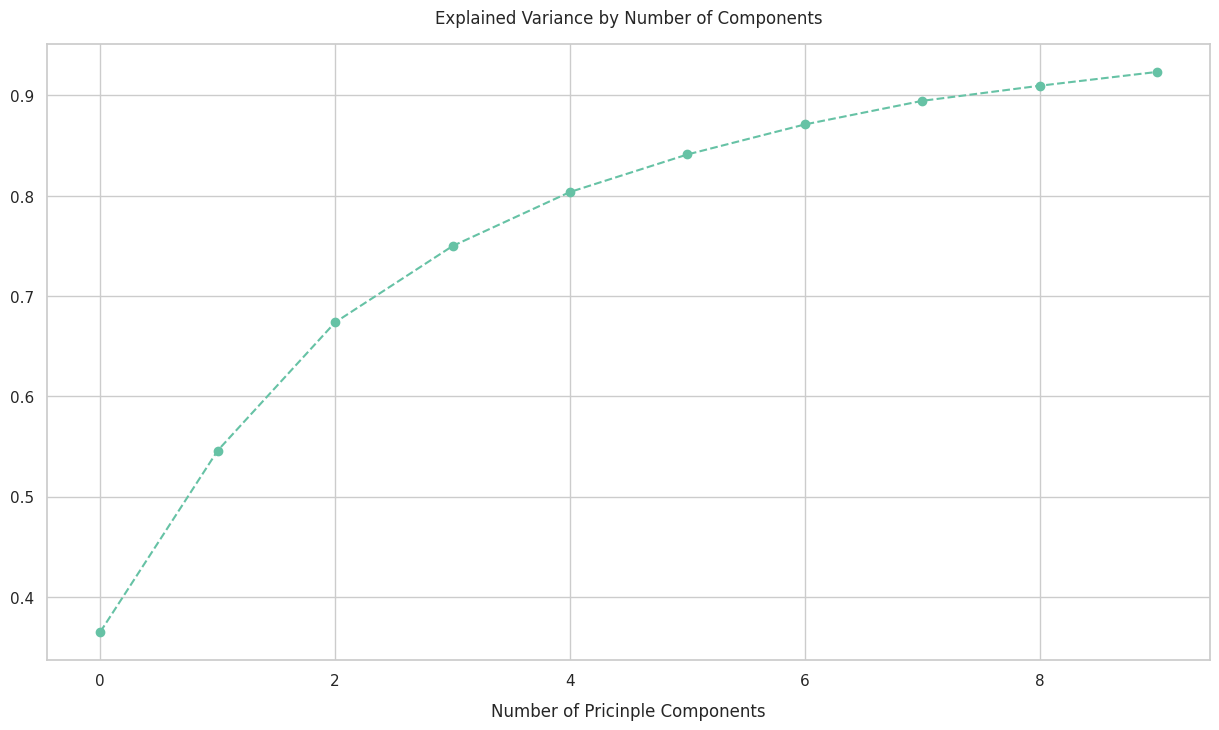

In [ ]:
# draw PCA variance curve
plt.figure(figsize=(15, 8))
plt.plot(pca_50d.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Pricinple Components')

For simplicity, we use 50d word-embedding.

In [ ]:
# reshape the data_frame
cuisines_word_embedding_vectors_pca_50d = pd.DataFrame(cuisines_word_embedding_vectors_pca_50d, columns=[f'cuisines_word_embedding_PC{i+1}' for i in range(10)])
cuisines_word_embedding_vectors_pca_50d.head()
cuisines_word_embedding_vectors_pca_50d1 = pd.DataFrame(cuisines_word_embedding_vectors_pca_50d1, columns=[f'cuisines_word_embedding_PC{i+1}' for i in range(10)])

In [ ]:
cuisines_word_embedding_vectors_pca_50d.shape

(28288, 10)

In [ ]:
final_zomato_restaurants.shape

(28288, 12)

In [ ]:
df1 = cuisines_word_embedding_vectors_pca_50d.reset_index(drop=True)
df1.head()

df11 = cuisines_word_embedding_vectors_pca_50d1.reset_index(drop=True)
df11.head()

,cuisines_word_embedding_PC1,cuisines_word_embedding_PC2,cuisines_word_embedding_PC3,cuisines_word_embedding_PC4,cuisines_word_embedding_PC5,cuisines_word_embedding_PC6,cuisines_word_embedding_PC7,cuisines_word_embedding_PC8,cuisines_word_embedding_PC9,cuisines_word_embedding_PC10
0,2.183805,-0.788710,0.186807,0.087276,-1.428621,-1.566089,0.221585,-0.164968,-0.031429,0.231903
1,1.272900,1.144433,-0.854103,-0.627286,-0.689159,0.591224,-0.683322,0.475536,0.095356,-0.808146
2,-1.243700,1.813936,-0.618347,-2.615212,-1.122238,0.871656,0.719234,0.854990,1.154576,-0.497740
3,-1.588587,1.750185,-0.286644,-2.512416,-0.977332,0.615828,0.679676,0.180313,0.255714,0.189915
4,-1.349903,2.014565,0.355777,0.073703,-0.959252,1.003507,0.725954,0.666746,0.383257,-0.023955


In [ ]:
df2 = final_zomato_restaurants.reset_index(drop=True)
df2.head()

df22 = ratings_need_mark_final.reset_index(drop=True)
df22.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),listed_in(city),original_index
0,No,No,3.6/5,8,Casual Dining,,"North Indian, South Indian, Andhra, Chinese",400.0,[],Buffet,Banashankari,6
1,Yes,No,3.1/5,13,Cafe,,"Cafe, Chinese, Continental, Italian",200.0,[],Cafes,Banashankari,19
2,No,No,3.6/5,28,Cafe,,"Cafe, Fast Food",450.0,[],Cafes,Banashankari,22
3,No,No,3.2/5,11,Cafe,,"Cafe, Bakery",300.0,[],Cafes,Banashankari,25
4,No,No,3.3/5,4,Cafe,,"Cafe, Fast Food, Beverages",250.0,[],Cafes,Banashankari,27


In [ ]:
# concate df1 and df2
final_zomato_restaurants = pd.concat([df2, df1], axis=1)
final_zomato_restaurants.head()

ratings_need_mark_final = pd.concat([df22, df11], axis=1)
ratings_need_mark_final.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,cuisines_word_embedding_PC1,cuisines_word_embedding_PC2,cuisines_word_embedding_PC3,cuisines_word_embedding_PC4,cuisines_word_embedding_PC5,cuisines_word_embedding_PC6,cuisines_word_embedding_PC7,cuisines_word_embedding_PC8,cuisines_word_embedding_PC9,cuisines_word_embedding_PC10
0,No,No,3.6/5,8,Casual Dining,,"North Indian, South Indian, Andhra, Chinese",400.0,[],Buffet,...,2.183805,-0.788710,0.186807,0.087276,-1.428621,-1.566089,0.221585,-0.164968,-0.031429,0.231903
1,Yes,No,3.1/5,13,Cafe,,"Cafe, Chinese, Continental, Italian",200.0,[],Cafes,...,1.272900,1.144433,-0.854103,-0.627286,-0.689159,0.591224,-0.683322,0.475536,0.095356,-0.808146
2,No,No,3.6/5,28,Cafe,,"Cafe, Fast Food",450.0,[],Cafes,...,-1.243700,1.813936,-0.618347,-2.615212,-1.122238,0.871656,0.719234,0.854990,1.154576,-0.497740
3,No,No,3.2/5,11,Cafe,,"Cafe, Bakery",300.0,[],Cafes,...,-1.588587,1.750185,-0.286644,-2.512416,-0.977332,0.615828,0.679676,0.180313,0.255714,0.189915
4,No,No,3.3/5,4,Cafe,,"Cafe, Fast Food, Beverages",250.0,[],Cafes,...,-1.349903,2.014565,0.355777,0.073703,-0.959252,1.003507,0.725954,0.666746,0.383257,-0.023955


### Visualiuze `approx_cost`

For `approx_cost` part, we can see the relationships between it and reatings. And moreover, the distribution of it.

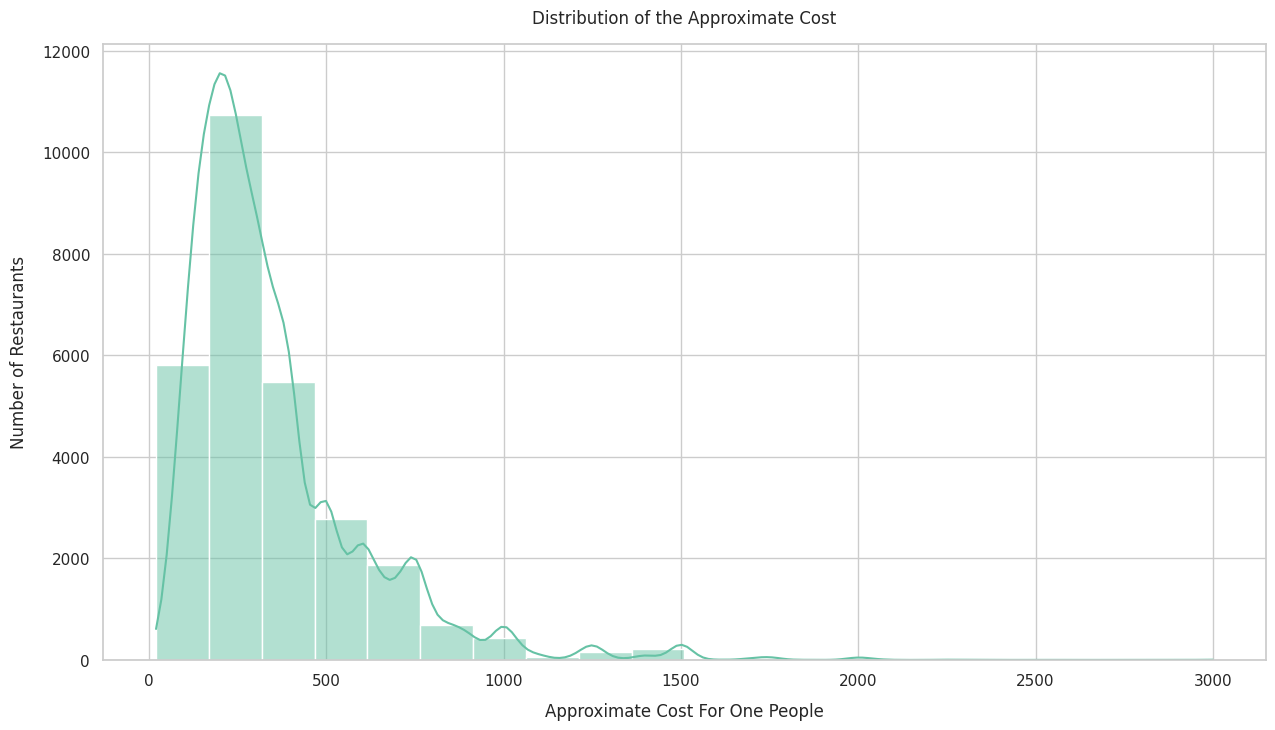

In [ ]:
# Draw the distribution of the approximate cost
plt.figure(figsize=(15, 8))
plt.title('Distribution of the Approximate Cost')
plt.xlabel('Approximate Cost For One People')
plt.ylabel('Number of Restaurants')
sns.histplot(final_zomato_restaurants['approx_cost_for_one_people'], bins=20, kde=True)
plt.show()

The cost of many restaurants are below 1000. So there's a question, do we need to do normalization to out data?

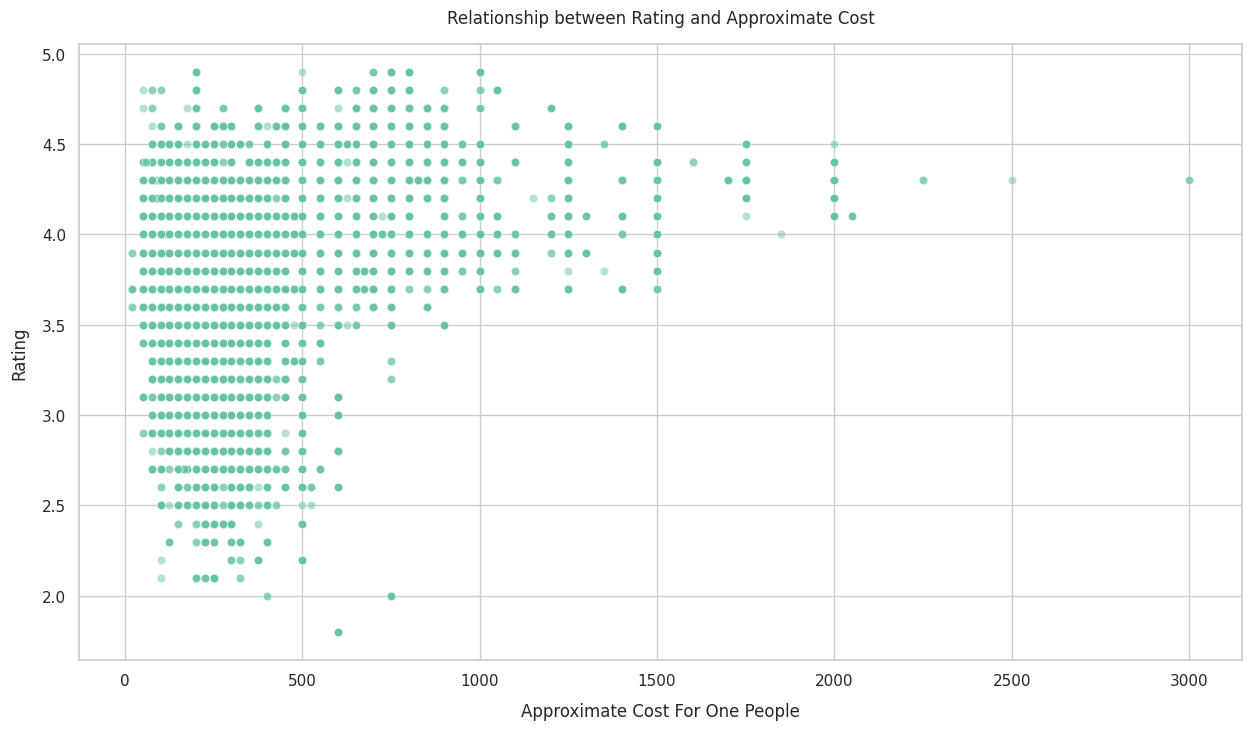

In [ ]:
# see the relation ship between rating and approx_cost
plt.figure(figsize=(15, 8))
plt.title('Relationship between Rating and Approximate Cost')
plt.xlabel('Approximate Cost For One People')
plt.ylabel('Rating')
sns.scatterplot(x='approx_cost_for_one_people', y='rate', data=final_zomato_restaurants, alpha=0.5)
plt.show()

In [ ]:
final_zomato_restaurants.to_csv('final_zomato_restaurants_with_word_embedding.csv', index=False)

### Visualize the menu_item

We can still visualize the menu_item to see the most often provided food of restaurants.

In [ ]:
len(final_zomato_restaurants['menu_item'].str.split(', '))

28288

In [ ]:
final_zomato_restaurants['menu_item'].str.split(', ')

,menu_item
0,[[]]
1,[[]]
2,[[]]
3,[[]]
4,[[]]
...,...
28283,[[]]
28284,[[]]
28285,[[]]
28286,[[]]


In [ ]:
# see if menu_itme contains nan
final_zomato_restaurants['menu_item'].isna().sum()
# fill nan with empty string
final_zomato_restaurants['menu_item'].fillna('', inplace=True)
ratings_need_mark_final['menu_item'].fillna('', inplace=True)

<ipython-input-77-efc6c24b0193>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ratings_need_mark_final['menu_item'].fillna('', inplace=True)


In [ ]:
len(final_zomato_restaurants['menu_item'])

28288

In [ ]:
# make all the menu_item as a tring
final_zomato_restaurants['menu_item'] = final_zomato_restaurants['menu_item'].astype(str)
ratings_need_mark_final['menu_item'] = ratings_need_mark_final['menu_item'].astype(str)

In [ ]:
# transform "[]" to empty string
final_zomato_restaurants['menu_item'] = final_zomato_restaurants['menu_item'].apply(lambda x: x.replace('[]', ''))
ratings_need_mark_final['menu_item'] = ratings_need_mark_final['menu_item'].apply(lambda x: x.replace('[]', ''))

In [ ]:
len(final_zomato_restaurants['menu_item'])

28288

In [ ]:
# Extract the menu_item
menu_item_list = final_zomato_restaurants['menu_item'].str.split(', ').explode().value_counts()
menu_item_list

,count
menu_item,
,20029
'Chicken Fried Rice',3155
'Veg Fried Rice',3083
'Paneer Butter Masala',2909
'Jeera Rice',2701
...,...
'Butter Milk [1 glass]',1
'Salted Lassi [1 glass]',1
'Sweet Lassi [1 glass]',1


Many restaurants do not provide `manu_item`. No problem, we need to do some selection.

In [ ]:
# Select count > 30
menu_item_list_top30 = menu_item_list[1:31]
menu_item_list_top30

,count
menu_item,
'Chicken Fried Rice',3155
'Veg Fried Rice',3083
'Paneer Butter Masala',2909
'Jeera Rice',2701
'Gobi Manchurian',2383
'Ghee Rice',2372
'Egg Fried Rice',2357
'Chicken Biryani',2108
'Veg Biryani',2104


<ipython-input-84-20e90b91b6c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menu_item_list_top30.index, y=menu_item_list_top30


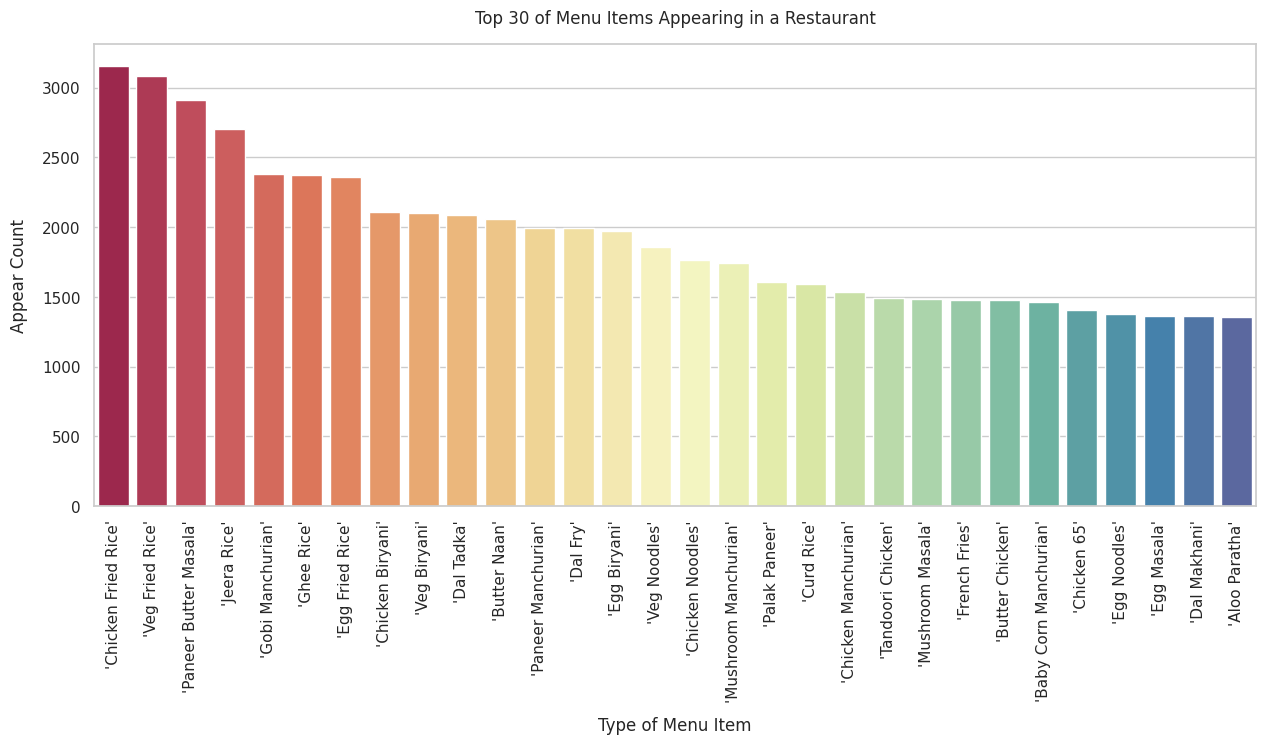

In [ ]:
# Draw the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=menu_item_list_top30.index, y=menu_item_list_top30
            .values, palette='Spectral')
plt.xlabel('Type of Menu Item')
plt.ylabel('Appear Count')
plt.title('Top 30 of Menu Items Appearing in a Restaurant')
plt.xticks(rotation=90)
plt.show()

If we want to analysis `menu_item`, I think there are several ways,

1. just count the # of menu items. But this may not *fair* to those who do not offer menu items.
2. treat this column as an **explainable** part. We can find out whether cuisines people like, if we get the high rating. (i.e draw the box-plot or something else)

In [ ]:
# change to 0/1. If not empty string, menu_item is 1, else is 0
final_zomato_restaurants['menu_item'] = final_zomato_restaurants['menu_item'].apply(lambda x: 1 if x != '' else 0)
final_zomato_restaurants['menu_item']

ratings_need_mark_final['menu_item'] = ratings_need_mark_final['menu_item'].apply(lambda x: 1 if x != '' else 0)

In [ ]:
final_zomato_restaurants['menu_item'].value_counts()


,count
menu_item,
0,20029
1,8259


In [ ]:
# save
final_zomato_restaurants.to_csv('final_zomato_restaurants_with_menu.csv', index=False)

### Visualize with `listed_in`

In [ ]:
# extract listed_in data
listed_in_list = final_zomato_restaurants['listed_in(type)'].value_counts()
listed_in_list

,count
listed_in(type),
Delivery,13533
Dine-out,9603
Desserts,1671
Cafes,1186
Drinks & nightlife,933
Buffet,806
Pubs and bars,556


<ipython-input-89-8515c3e0bbcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listed_in_list.index, y=listed_in_list.values, palette='Spectral')


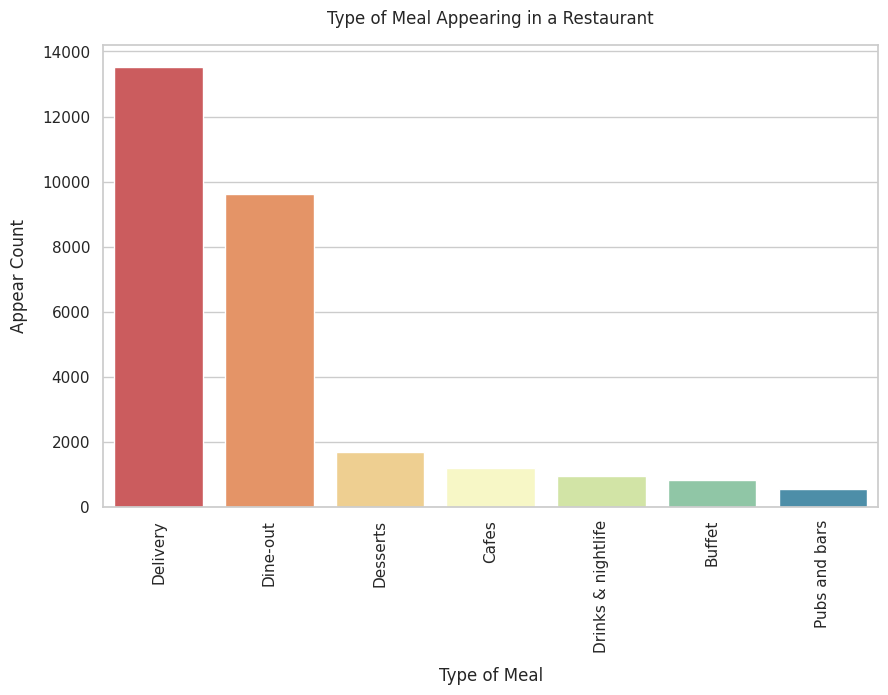

In [ ]:
# Draw a chart to show the type and count
plt.figure(figsize=(10, 6))
sns.barplot(x=listed_in_list.index, y=listed_in_list.values, palette='Spectral')
plt.xlabel('Type of Meal')
plt.ylabel('Appear Count')
plt.title('Type of Meal Appearing in a Restaurant')
plt.xticks(rotation=90)
plt.show()

<ipython-input-90-5a1f92da581f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listed_in_list.index, y=listed_in_list.values, palette='Spectral')


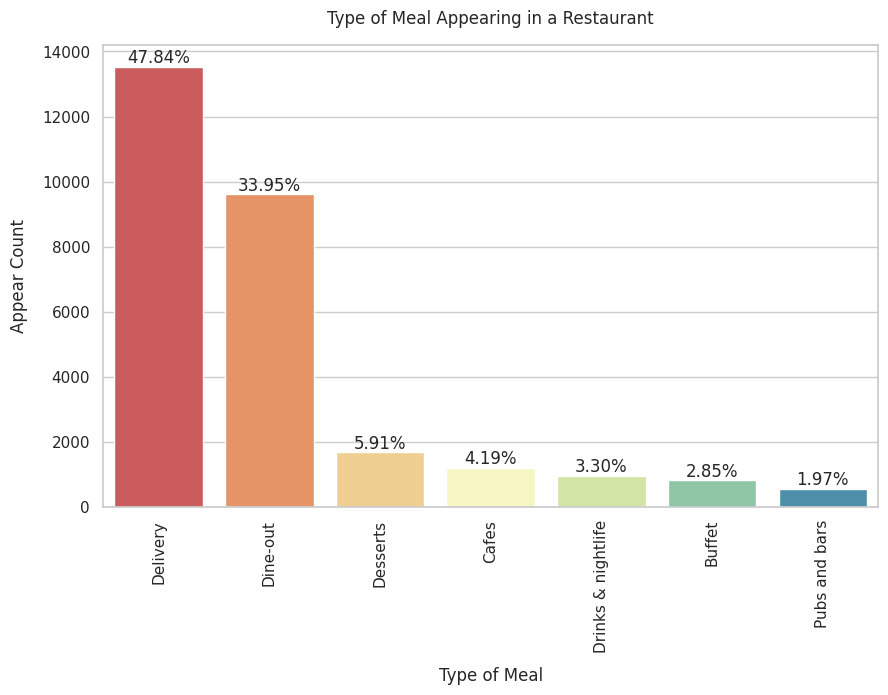

In [ ]:
# Show the percentage in a chart, and show the percentage on the bar
plt.figure(figsize=(10, 6))
sns.barplot(x=listed_in_list.index, y=listed_in_list.values, palette='Spectral')
plt.xlabel('Type of Meal')
plt.ylabel('Appear Count')
plt.title('Type of Meal Appearing in a Restaurant')
plt.xticks(rotation=90)
for i, v in enumerate(listed_in_list.values):
    plt.text(i, v, f'{v/listed_in_list.sum()*100:.2f}%', ha='center', va='bottom')
plt.show()

For the `listed_in`, we can just treat it as one-hot encoding.

In [ ]:
# transfer listed_in into one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

# one hot encoding
listed_in_type = final_zomato_restaurants['listed_in(type)'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()

listed_in_type_dummies = pd.DataFrame(mlb.fit_transform(listed_in_type), columns=mlb.classes_, index=final_zomato_restaurants.index)
listed_in_type_dummies.head()

listed_in_type1 = ratings_need_mark_final['listed_in(type)'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
listed_in_type_dummies1 = pd.DataFrame(mlb.fit_transform(listed_in_type1), columns=mlb.classes_, index=ratings_need_mark_final.index)


In [ ]:
# concat dummies to original data
final_zomato_restaurants = pd.concat([final_zomato_restaurants, listed_in_type_dummies], axis=1)
final_zomato_restaurants.head()

ratings_need_mark_final = pd.concat([ratings_need_mark_final, listed_in_type_dummies1], axis=1)
ratings_need_mark_final.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,cuisines_word_embedding_PC8,cuisines_word_embedding_PC9,cuisines_word_embedding_PC10,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,No,No,3.6/5,8,Casual Dining,,"North Indian, South Indian, Andhra, Chinese",400.0,0,Buffet,...,-0.164968,-0.031429,0.231903,1,0,0,0,0,0,0
1,Yes,No,3.1/5,13,Cafe,,"Cafe, Chinese, Continental, Italian",200.0,0,Cafes,...,0.475536,0.095356,-0.808146,0,1,0,0,0,0,0
2,No,No,3.6/5,28,Cafe,,"Cafe, Fast Food",450.0,0,Cafes,...,0.854990,1.154576,-0.497740,0,1,0,0,0,0,0
3,No,No,3.2/5,11,Cafe,,"Cafe, Bakery",300.0,0,Cafes,...,0.180313,0.255714,0.189915,0,1,0,0,0,0,0
4,No,No,3.3/5,4,Cafe,,"Cafe, Fast Food, Beverages",250.0,0,Cafes,...,0.666746,0.383257,-0.023955,0,1,0,0,0,0,0


In [ ]:
final_zomato_restaurants.shape

(28288, 29)

In [ ]:
# save
final_zomato_restaurants.to_csv('final_zomato_restaurants_with_listed_in.csv', index=False)

### Visualize online orders

We can firstly transform the orders to 0-1 encoding. And visualize it.

In [ ]:
# convert online_order into 0/1 encoding
final_zomato_restaurants['online_order'] = final_zomato_restaurants['online_order'].map({'Yes': 1, 'No': 0})
final_zomato_restaurants.head()

ratings_need_mark_final['online_order'] = ratings_need_mark_final['online_order'].map({'Yes': 1, 'No': 0})
ratings_need_mark_final.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,cuisines_word_embedding_PC8,cuisines_word_embedding_PC9,cuisines_word_embedding_PC10,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,0,No,3.6/5,8,Casual Dining,,"North Indian, South Indian, Andhra, Chinese",400.0,0,Buffet,...,-0.164968,-0.031429,0.231903,1,0,0,0,0,0,0
1,1,No,3.1/5,13,Cafe,,"Cafe, Chinese, Continental, Italian",200.0,0,Cafes,...,0.475536,0.095356,-0.808146,0,1,0,0,0,0,0
2,0,No,3.6/5,28,Cafe,,"Cafe, Fast Food",450.0,0,Cafes,...,0.854990,1.154576,-0.497740,0,1,0,0,0,0,0
3,0,No,3.2/5,11,Cafe,,"Cafe, Bakery",300.0,0,Cafes,...,0.180313,0.255714,0.189915,0,1,0,0,0,0,0
4,0,No,3.3/5,4,Cafe,,"Cafe, Fast Food, Beverages",250.0,0,Cafes,...,0.666746,0.383257,-0.023955,0,1,0,0,0,0,0


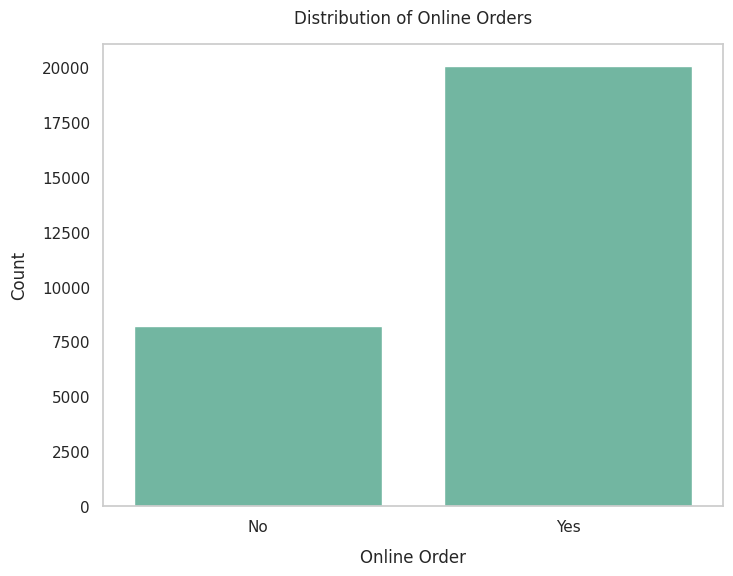

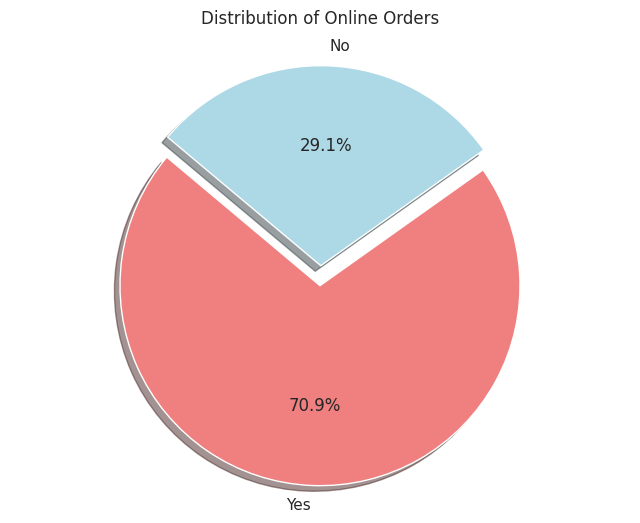

In [ ]:
# Visualization
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=final_zomato_restaurants)
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Customizing the x-ticks
plt.grid(axis='y')
plt.show()

# Pie chart
order_counts = final_zomato_restaurants['online_order'].value_counts()

labels = ['Yes', 'No']
sizes = order_counts
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Online Orders')
plt.show()

### Visualize book table

Same as before.

In [ ]:
# data preprocessing for feature "book_table"

# Convert 'book_table' values to 1 and 0 where Yes = 1, No = 0
final_zomato_restaurants['book_table'] = final_zomato_restaurants['book_table'].map({'Yes': 1, 'No': 0})
final_zomato_restaurants.head()

ratings_need_mark_final['book_table'] = ratings_need_mark_final['book_table'].map({'Yes': 1, 'No': 0})
ratings_need_mark_final.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,cuisines_word_embedding_PC8,cuisines_word_embedding_PC9,cuisines_word_embedding_PC10,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,0,0,3.6/5,8,Casual Dining,,"North Indian, South Indian, Andhra, Chinese",400.0,0,Buffet,...,-0.164968,-0.031429,0.231903,1,0,0,0,0,0,0
1,1,0,3.1/5,13,Cafe,,"Cafe, Chinese, Continental, Italian",200.0,0,Cafes,...,0.475536,0.095356,-0.808146,0,1,0,0,0,0,0
2,0,0,3.6/5,28,Cafe,,"Cafe, Fast Food",450.0,0,Cafes,...,0.854990,1.154576,-0.497740,0,1,0,0,0,0,0
3,0,0,3.2/5,11,Cafe,,"Cafe, Bakery",300.0,0,Cafes,...,0.180313,0.255714,0.189915,0,1,0,0,0,0,0
4,0,0,3.3/5,4,Cafe,,"Cafe, Fast Food, Beverages",250.0,0,Cafes,...,0.666746,0.383257,-0.023955,0,1,0,0,0,0,0


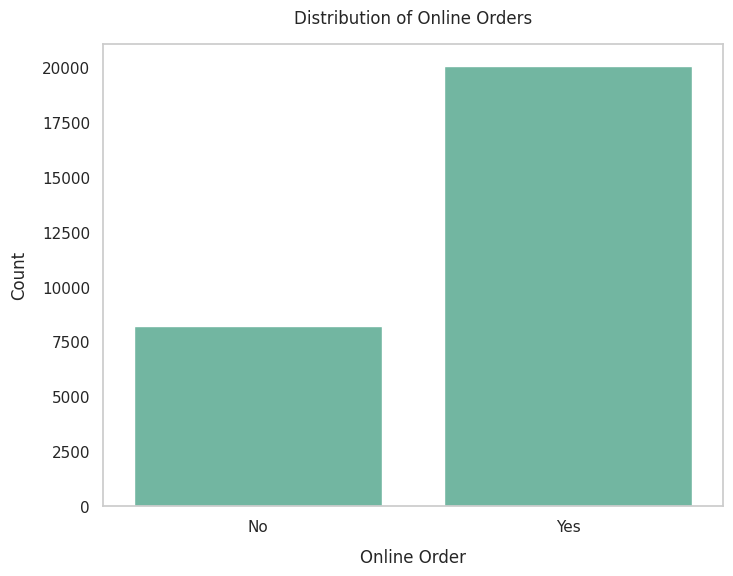

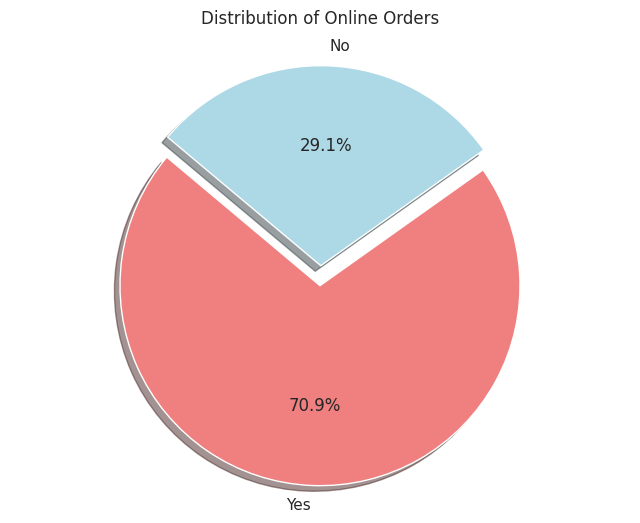

In [ ]:
# Visualization
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=final_zomato_restaurants)
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Customizing the x-ticks
plt.grid(axis='y')
plt.show()

# Pie chart
order_counts = final_zomato_restaurants['online_order'].value_counts()

labels = ['Yes', 'No']
sizes = order_counts
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Online Orders')
plt.show()


### Visualize rest type

In [ ]:
# data preprocessing for feature "rest_type"
from sklearn.preprocessing import MultiLabelBinarizer

# cont number of types rest support
final_zomato_restaurants['multiple_types'] = final_zomato_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))
ratings_need_mark_final['multiple_types'] = ratings_need_mark_final['rest_type'].astype(str).apply(lambda x: len(x.split(',')))

# one hot encoding
final_zomato_restaurants['rest_type'] = final_zomato_restaurants['rest_type'].apply(lambda x: ', '.join(sorted(str(x).split(', '))) if pd.notnull(x) else x)
ratings_need_mark_final['rest_type'] = ratings_need_mark_final['rest_type'].apply(lambda x: ', '.join(sorted(str(x).split(', '))) if pd.notnull(x) else x)
final_zomato_restaurants['rest_type_list'] = final_zomato_restaurants['rest_type'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
ratings_need_mark_final['rest_type_list'] = ratings_need_mark_final['rest_type'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
rest_type_dummies = pd.DataFrame(mlb.fit_transform(final_zomato_restaurants['rest_type_list']), columns=mlb.classes_, index=final_zomato_restaurants.index)
final_zomato_restaurants = pd.concat([final_zomato_restaurants, rest_type_dummies], axis=1)

rest_type_dummies1 = pd.DataFrame(mlb.fit_transform(ratings_need_mark_final['rest_type_list']), columns=mlb.classes_, index=ratings_need_mark_final.index)
ratings_need_mark_final = pd.concat([ratings_need_mark_final, rest_type_dummies1], axis=1)

In [ ]:
final_zomato_restaurants.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,Irani Cafee,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,0,Buffet,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_zomato_restaurants.shape

(28288, 53)

<ipython-input-102-0bcc78a7bcb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rest, x=rest.index, palette='Spectral')
<ipython-input-102-0bcc78a7bcb6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rest.index, x=rest, palette='Spectral')


Text(0.5, 0, 'count')

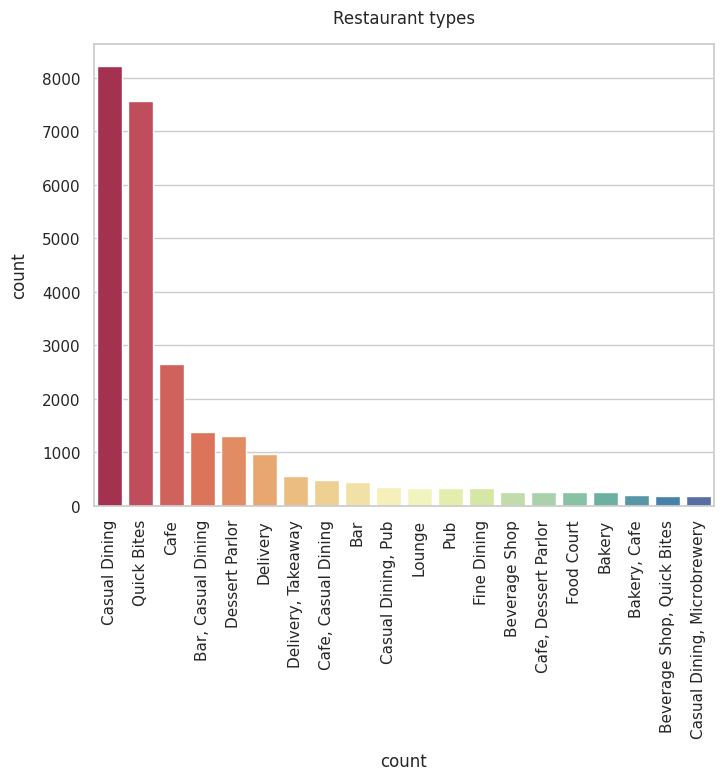

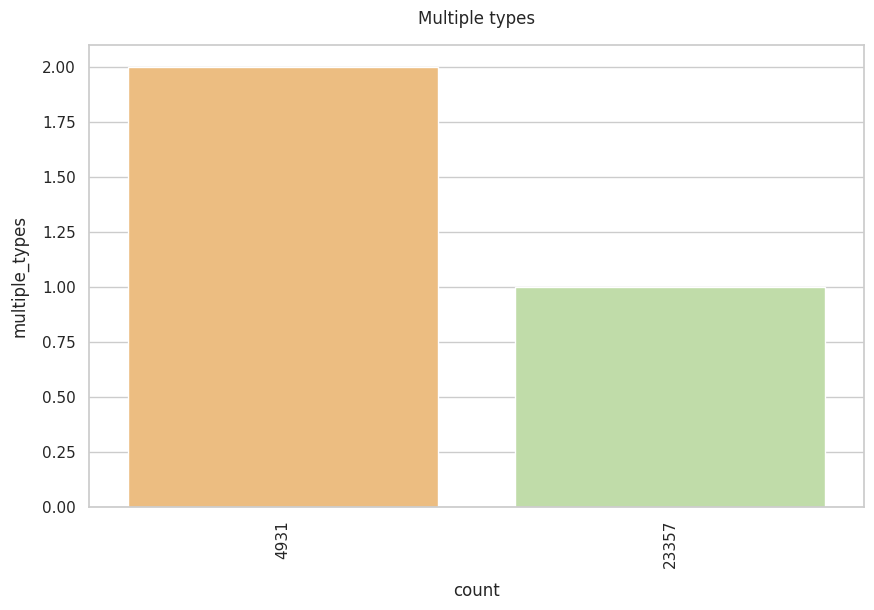

In [ ]:
# visulization part

plt.figure(figsize=(8,6))
rest=final_zomato_restaurants['rest_type'].value_counts()[:20]
sns.barplot(y=rest, x=rest.index, palette='Spectral')
plt.xticks(rotation=90)
plt.title("Restaurant types")
plt.xlabel("count")

plt.figure(figsize=(10,6))
rest=final_zomato_restaurants['multiple_types'].value_counts()
sns.barplot(y=rest.index, x=rest, palette='Spectral')
plt.title("Multiple types")
plt.xticks(rotation=90)
plt.xlabel("count")

### Visualize listed_in(city)

This part we want to see the distribution of restaurants in geography. And see the relationship between restaurants and listed_in places.

<ipython-input-103-3bbf790a9a72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(city)', data=final_zomato_restaurants, palette='Spectral')


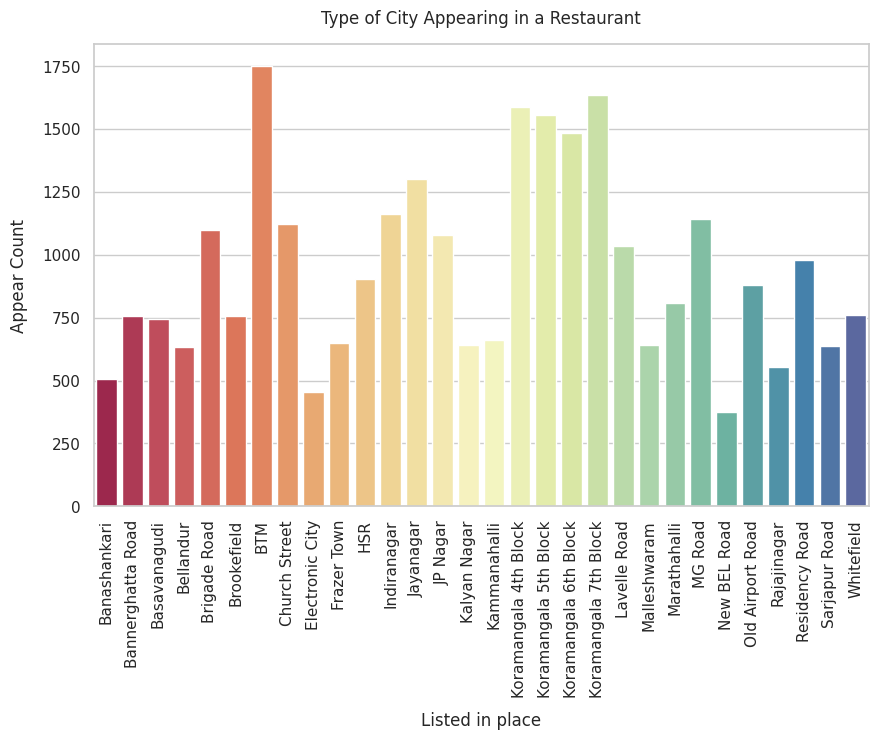

In [ ]:
# visualize listed_in_city
plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in(city)', data=final_zomato_restaurants, palette='Spectral')
plt.xlabel('Listed in place')
plt.ylabel('Appear Count')
plt.title('Type of City Appearing in a Restaurant')
plt.xticks(rotation=90)
plt.show()

<ipython-input-104-088d67237e48>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')


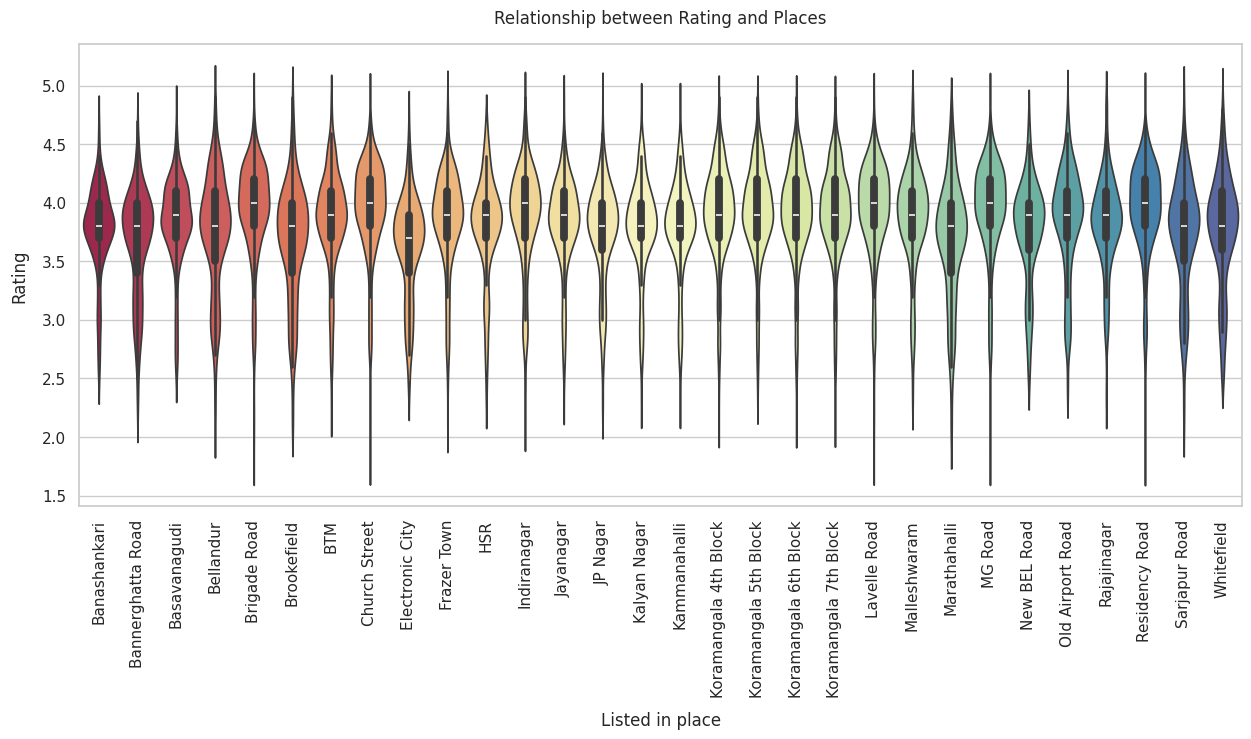

In [ ]:
# see distribution of rating and places
plt.figure(figsize=(15,6))
plt.title('Relationship between Rating and Places')
plt.xlabel('Listed in place')
plt.ylabel('Rating')
plt.xticks(rotation=90)
sns.violinplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')
plt.show()

<ipython-input-105-059a3619ea2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')


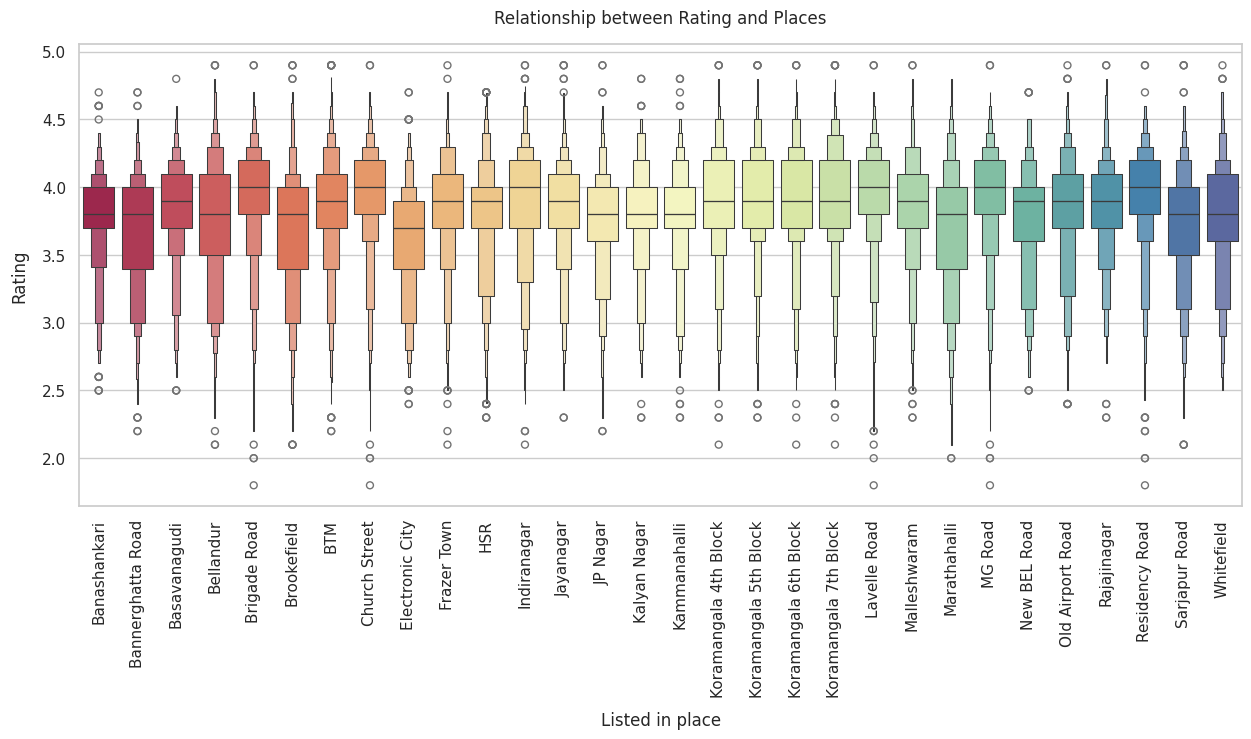

In [ ]:
# see distribution of rating and places
plt.figure(figsize=(15,6))
plt.title('Relationship between Rating and Places')
plt.xlabel('Listed in place')
plt.ylabel('Rating')
plt.xticks(rotation=90)
sns.boxenplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')
plt.show()

<ipython-input-106-3ff41be72ded>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')


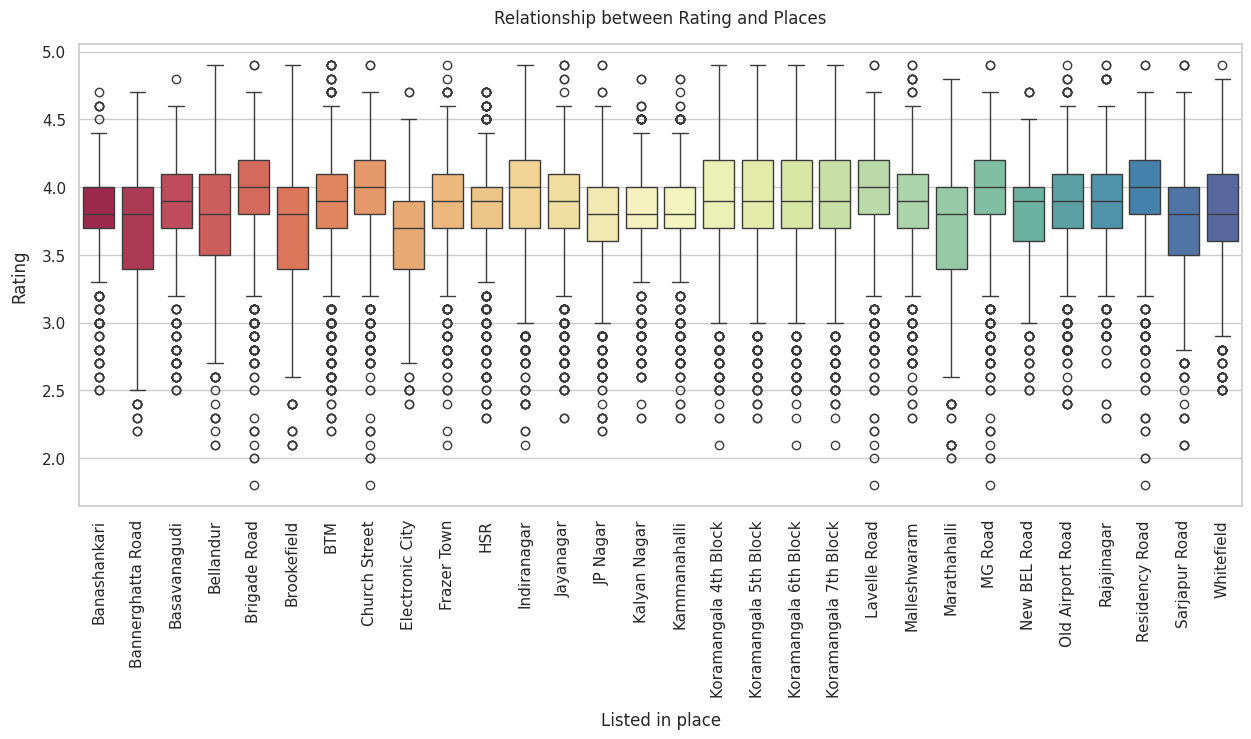

In [ ]:
# see distribution of rating and places
plt.figure(figsize=(15,6))
plt.title('Relationship between Rating and Places')
plt.xlabel('Listed in place')
plt.ylabel('Rating')
plt.xticks(rotation=90)
sns.boxplot(x='listed_in(city)', y='rate', data=final_zomato_restaurants, palette='Spectral')
plt.show()

In [ ]:
# transform the listed_in(city) to one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

# one hot encoding
listed_in_city = final_zomato_restaurants['listed_in(city)'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
listed_in_city1 = ratings_need_mark_final['listed_in(city)'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
listed_in_city_dummies = pd.DataFrame(mlb.fit_transform(listed_in_city), columns=mlb.classes_, index=final_zomato_restaurants.index)
listed_in_city_dummies.head()
listed_in_city_dummies1 = pd.DataFrame(mlb.fit_transform(listed_in_city1), columns=mlb.classes_, index=ratings_need_mark_final.index)
listed_in_city_dummies1.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concat the 0/1 to the original dataset
final_zomato_restaurants_ = pd.concat([final_zomato_restaurants, listed_in_city_dummies], axis=1)

ratings_need_mark_final_ = pd.concat([ratings_need_mark_final, listed_in_city_dummies1], axis=1)
final_zomato_restaurants_.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_one_people,menu_item,listed_in(type),...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",400.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",150.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",300.0,0,Buffet,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_zomato_restaurants_.shape

(28288, 83)

In [ ]:
# save the dataset
final_zomato_restaurants_.to_csv('final_zomato_restaurants_.csv', index=False)

In [ ]:
final_zomato_restaurants_['dish_liked'] = final_zomato_restaurants_['dish_liked'].astype(str).apply(lambda x: len(x.split(',')))
ratings_need_mark_final_['dish_liked'] = ratings_need_mark_final_['dish_liked'].astype(str).apply(lambda x: len(x.split(',')))

In [ ]:
final_zomato_restaurants_['rest_type_list']

,rest_type_list
0,[Casual Dining]
1,[Casual Dining]
2,"[Cafe, Casual Dining]"
3,[Quick Bites]
4,[Casual Dining]
...,...
28283,"[Bar, Fine Dining]"
28284,"[Bar, Casual Dining]"
28285,"[Bar, Casual Dining]"
28286,"[Bar, Casual Dining]"


## 6. Get our Final Dataset

After analysis the nature of datasets, we can now construct out final features and ready to construct the rating prediction model.

Our feature will be,
* `listed_in(city)`: provide geography information. (地区)
* `location`: provide some geography information.


* `online_order`: A 0/1 feature. Showing whether a restaurant supports online ordering or not.
* `book_table`: A 0/1 feature. Showing whether a restaurant supports booking table or bot.
* `rest_type`: type of restaurant. 0/1

* `dish_liked`: people like. 1~N
* `cuisines`: provide cuisines. Can use some text-analysis technologies. -> vector (10 dimension)
* `approx_cost`: useful. (one people)
* `menu_item`: useful. How can we use it? (不用) 0/1

* `listed_in(type)`: what kind of restaurant does it? 0/1

8个x -> 1个y

* `rate`: our $y_{pred}$

linear regression + 有交叉项的




In [ ]:
# eliminate useless or dealt columns
# copy the dataset
neated_final_zomato_restaurants = final_zomato_restaurants_.copy()
neated_ratings_need_mark_final = ratings_need_mark_final_.copy()
# eliminate votes
neated_final_zomato_restaurants.drop(columns=['votes'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['votes'], inplace=True)
# eliminate rest_type
neated_final_zomato_restaurants.drop(columns=['rest_type'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['rest_type'], inplace=True)
# eliminate location
neated_final_zomato_restaurants.drop(columns=['cuisines'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['cuisines'], inplace=True)
# eliminate listed_in
neated_final_zomato_restaurants.drop(columns=['listed_in(city)'], inplace=True)
neated_final_zomato_restaurants.drop(columns=['listed_in(type)'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['listed_in(city)'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['listed_in(type)'], inplace=True)
# eliminate rest_type_list
neated_final_zomato_restaurants.drop(columns=['rest_type_list'], inplace=True)
neated_ratings_need_mark_final.drop(columns=['rest_type_list'], inplace=True)

In [ ]:
neated_final_zomato_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28288 entries, 0 to 28287
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   online_order                  28288 non-null  int64  
 1   book_table                    28288 non-null  int64  
 2   rate                          28288 non-null  float64
 3   dish_liked                    28288 non-null  int64  
 4   approx_cost_for_one_people    28288 non-null  float64
 5   menu_item                     28288 non-null  int64  
 6   original_index                28288 non-null  int64  
 7   cuisines_word_embedding_PC1   28288 non-null  float64
 8   cuisines_word_embedding_PC2   28288 non-null  float64
 9   cuisines_word_embedding_PC3   28288 non-null  float64
 10  cuisines_word_embedding_PC4   28288 non-null  float64
 11  cuisines_word_embedding_PC5   28288 non-null  float64
 12  cuisines_word_embedding_PC6   28288 non-null  float64
 13  c

In [ ]:
neated_final_zomato_restaurants.to_csv('neated_final_zomato_restaurants11.csv', index=False)

In [ ]:
neated_ratings_need_mark_final.to_csv('neated_ratings_need_mark_final11.csv', index=False)

neated_ratings_need_mark_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23202 entries, 0 to 23201
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   online_order                  23202 non-null  int64  
 1   book_table                    23202 non-null  int64  
 2   rate                          15503 non-null  object 
 3   dish_liked                    23202 non-null  int64  
 4   approx_cost_for_one_people    23202 non-null  float64
 5   menu_item                     23202 non-null  int64  
 6   original_index                23202 non-null  int64  
 7   cuisines_word_embedding_PC1   23202 non-null  float64
 8   cuisines_word_embedding_PC2   23202 non-null  float64
 9   cuisines_word_embedding_PC3   23202 non-null  float64
 10  cuisines_word_embedding_PC4   23202 non-null  float64
 11  cuisines_word_embedding_PC5   23202 non-null  float64
 12  cuisines_word_embedding_PC6   23202 non-null  float64
 13  c

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive

In [ ]:

drive.mount('/content/drive')

# load dataset from google drive
zomato = pd.read_csv('/content/drive/MyDrive/zomato.csv')

Mounted at /content/drive


In [ ]:
# remove useless features
zomato = zomato.drop(columns=['url'])

zomato.head()

KeyError: "['url'] not found in axis"

In [ ]:
# data preprocessing for feature "online_order"

# Convert 'online_order' values to 1 and 0 where Yes = 1, No = 0
zomato['online_order'] = zomato['online_order'].map({'Yes': 1, 'No': 0})

In [ ]:
# Visualization
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=zomato)
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Customizing the x-ticks
plt.grid(axis='y')
plt.show()

# Pie chart
order_counts = zomato['online_order'].value_counts()

labels = ['Yes', 'No']
sizes = order_counts
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Online Orders')
plt.show()


In [ ]:
# data preprocessing for feature "book_table"

# Convert 'book_table' values to 1 and 0 where Yes = 1, No = 0
zomato['book_table'] = zomato['book_table'].map({'Yes': 1, 'No': 0})


In [ ]:
# Visualization
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='book_table', data=zomato)
plt.title('Distribution of Book Table')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Customizing the x-ticks
plt.grid(axis='y')
plt.show()

# Pie chart
order_counts = zomato['book_table'].value_counts()

labels = ['No', 'Yes']
sizes = order_counts
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Book Table')
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# data preprocessing for feature "rest_type"

# cont number of types rest support
zomato['multiple_types'] = zomato['rest_type'].astype(str).apply(lambda x: len(x.split(',')))

# one hot encoding
zomato['rest_type'] = zomato['rest_type'].apply(lambda x: ', '.join(sorted(str(x).split(', '))) if pd.notnull(x) else x)
zomato['rest_type_list'] = zomato['rest_type'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
rest_type_dummies = pd.DataFrame(mlb.fit_transform(zomato['rest_type_list']), columns=mlb.classes_, index=zomato.index)
zomato = pd.concat([zomato, rest_type_dummies], axis=1)

In [ ]:
# visulization

plt.figure(figsize=(7,7))
rest=zomato['rest_type'].value_counts()[:20]
sns.barplot(y=rest.index, x=rest)
plt.title("Restaurant types")
plt.xlabel("count")

plt.figure(figsize=(7,7))
rest=zomato['multiple_types'].value_counts()
sns.barplot(y=rest.index, x=rest)
plt.title("Multiple types")
plt.xlabel("count")

In [ ]:
zomato['multiple_types'] = zomato['rest_type'].astype(str).apply(lambda x: len(x.split(',')))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

zomato['rest_type_list'] = zomato['rest_type'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
rest_type_dummies = pd.DataFrame(mlb.fit_transform(zomato['rest_type_list']), columns=mlb.classes_, index=zomato.index)
zomato = pd.concat([zomato, rest_type_dummies], axis=1)

In [ ]:
# cont number of dishes
zomato['multiple_dish'] = zomato['dish_liked'].astype(str).apply(lambda x: len(x.split(',')))

In [ ]:
zomato['multiple_dish'].head()

,multiple_dish
0,7
1,7
2,7
3,1
4,2


In [ ]:
a = pd.read_csv("/content/ratings_need_mark11.csv")
b = pd.read_csv("/content/final_zomato_restaurants11.csv")
c = pd.read_csv("/content/neated_final_zomato_restaurants11.csv")
d = pd.read_csv("/content/neated_ratings_need_mark_final11.csv")

<ipython-input-122-6f5fb1a52039>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("/content/neated_ratings_need_mark_final11.csv")


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23202 entries, 0 to 23201
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  23202 non-null  int64  
 1   online_order                23202 non-null  object 
 2   book_table                  23202 non-null  object 
 3   rate                        15503 non-null  object 
 4   votes                       23202 non-null  int64  
 5   rest_type                   23202 non-null  object 
 6   dish_liked                  265 non-null    object 
 7   cuisines                    23180 non-null  object 
 8   approx_cost_for_one_people  23202 non-null  float64
 9   menu_item                   23202 non-null  object 
 10  listed_in(type)             23202 non-null  object 
 11  listed_in(city)             23202 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.1+ MB


In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28288 entries, 0 to 28287
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28288 non-null  int64  
 1   online_order                28288 non-null  object 
 2   book_table                  28288 non-null  object 
 3   rate                        28288 non-null  float64
 4   votes                       28288 non-null  int64  
 5   rest_type                   28288 non-null  object 
 6   dish_liked                  23304 non-null  object 
 7   cuisines                    28286 non-null  object 
 8   approx_cost_for_one_people  28288 non-null  float64
 9   menu_item                   28288 non-null  object 
 10  listed_in(type)             28288 non-null  object 
 11  listed_in(city)             28288 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.6+ MB


In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28288 entries, 0 to 28287
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   online_order                  28288 non-null  int64  
 1   book_table                    28288 non-null  int64  
 2   rate                          28288 non-null  float64
 3   dish_liked                    28288 non-null  int64  
 4   approx_cost_for_one_people    28288 non-null  float64
 5   menu_item                     28288 non-null  int64  
 6   cuisines_word_embedding_PC1   28288 non-null  float64
 7   cuisines_word_embedding_PC2   28288 non-null  float64
 8   cuisines_word_embedding_PC3   28288 non-null  float64
 9   cuisines_word_embedding_PC4   28288 non-null  float64
 10  cuisines_word_embedding_PC5   28288 non-null  float64
 11  cuisines_word_embedding_PC6   28288 non-null  float64
 12  cuisines_word_embedding_PC7   28288 non-null  float64
 13  c

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23202 entries, 0 to 23201
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   online_order                  23202 non-null  int64  
 1   book_table                    23202 non-null  int64  
 2   rate                          15503 non-null  object 
 3   dish_liked                    23202 non-null  int64  
 4   approx_cost_for_one_people    23202 non-null  float64
 5   menu_item                     23202 non-null  int64  
 6   cuisines_word_embedding_PC1   23202 non-null  float64
 7   cuisines_word_embedding_PC2   23202 non-null  float64
 8   cuisines_word_embedding_PC3   23202 non-null  float64
 9   cuisines_word_embedding_PC4   23202 non-null  float64
 10  cuisines_word_embedding_PC5   23202 non-null  float64
 11  cuisines_word_embedding_PC6   23202 non-null  float64
 12  cuisines_word_embedding_PC7   23202 non-null  float64
 13  c